# Project 2: Parkinson's Dataset

Project 2
- Enrique Almazán Sánchez
- Judith Briz Galera


## Introduction

Building upon the foundational groundwork established in Project 1, where we meticulously curated and preprocessed our dataset by addressing challenges such as null and duplicate values, outlayers, and class imbalance, this project embarks on a deeper exploration of the dataset through the lens of parametric regression and classification. With a keen focus on leveraging Artificial Intelligence (AI) and Machine Learning (ML) techniques, we aim to unravel the intricate relationships embedded within the diverse features, shedding light on their potential to aid in the detection and assessment of Parkinson's disease.

In the previous project, we undertook the critical tasks of data cleaning and preparation, ensuring the integrity and quality of our dataset. Now, we shift our focus to the application of parametric regression and classification models, delving into the specifics of predicting continuous outcomes through regression and binary outcomes through classification.

## Objectives

1. **Parametric Regression:**
   - **Linear Regression:** We aim to identify the dependent variable, potentially the UPDRS score, and evaluate its relationship with pertinent features. Additionally, we explore the impact of normalization on model performance.
   - **Multiple Linear Regression:** Investigating changes in estimators, correlation coefficients, and performance metrics with varying numbers of explanatory variables is a key objective. We seek to uncover the relevance of features in predicting UPDRS scores.
   - **Non-linear Regression:** Our goal is to identify non-linear functions that best capture the nuances within the UPDRS data.
   - **Linear Regression with Regularization:** We explore the impact of regularization techniques, such as ridge regression, LASSO, and elastic net, on model performance. Simultaneously, we aim to identify relevant features using regularization methods.
   

2. **Parametric Classification:**
   - **Simple Logistic Regression:** Focused on the 'status' variable, our objective is to understand its relationship with relevant features. We determine the best estimate of the target variable and assess classifier performance.
   - **Multiple Logistic Regression:** Analyzing changes in coefficients and figures of merit with varying numbers of explanatory variables, we aim to identify and justify the most relevant features for classifying 'status.'
   - **Logistic Regression with Regularization:** We explore the impact of regularization methods, including Ridge, LASSO, and Elastic Net, on classification performance. Our aim is to determine relevant features using regularization techniques.
   

3. **Comparison of Results:**
   - A comprehensive comparison of performance measures in both the validation and test sets for each model forms a critical aspect of this project. We will delve into the reasoning behind the choice between linear and non-linear parametric schemes for regression and classification tasks. Additionally, we will scrutinize the influence of a single partition of cases in the training and test sets on the obtained results, and a new split will be performed for thorough analysis.

By undertaking these objectives, we seek to uncover patterns, relationships, and predictive capabilities within our dataset that will contribute to advancing the understanding of Parkinson's disease and potentially enhance diagnostic methodologies.

## Previous concerns

In Project 1, we identified significant concerns related to feature correlation and its potential impact on feature selection and target variable estimation. A notable observation was the presence of distinct groups of features exhibiting high correlation, with most relationships being direct. This issue raised concerns about redundancy within these feature clusters and the need for effective feature selection methods to mitigate multicollinearity.

Furthermore, an important aspect highlighted was the relatively low correlation between the features and both target variables, 'Status' and 'UPDRS_numeric.' This underscored the challenge of identifying features that offer the most accurate estimation of these key variables. As we transition to Project 2, addressing these concerns becomes paramount. Our strategy involves employing advanced feature selection techniques and correlation analysis to ensure a refined and relevant set of features, ultimately enhancing the interpretability and performance of our regression and classification models.

Also, the problem presented for our dataset vary depending on the independent variable chosen, having:
- Binary clasification problem regarding the status of the patient.
- Multiclass clasification problen regarding the UPDRS of each patient.

## Dependencies (Required Libraries)

In the following cell, we import all the necessary libraries for the project.

- **Pandas**: A Python library used for data analysis and manipulation. It provides flexible and efficient data structures, such as DataFrames, for working with tabular datasets. Pandas offers a wide range of functions and methods for cleaning, transforming, and exploring data, making the data preparation process easier before applying machine learning algorithms.

- **NumPy**: A fundamental library for scientific computing in Python. It provides a data structure called a multidimensional array (ndarray) that allows for efficient operations on data arrays. NumPy is widely used in numerical analysis and data processing, providing functionality for mathematical operations, array manipulation, and statistical calculations.

- **scipy.stats**: Python library within SciPy that focuses on statistical functions and probability distributions. It offers tools for working with probability distributions, statistical tests, random variables, descriptive statistics, and modeling. It's a versatile library used for statistical analysis and hypothesis testing in scientific research and data analysis.

- **Matplotlib**: A data visualization library in Python. It provides a wide range of functions and methods for creating static plots, such as line plots, bar charts, scatter plots, and contour plots. Matplotlib is highly customizable and allows for adding labels, titles, legends, and other annotations to plots. It is a popular tool for data visualization in data analysis and result presentation.

- **Plotly**: An interactive data visualization library for Python. It enables the creation of interactive and dynamic charts, including scatter plots, line charts, bar charts, and surface plots. Plotly offers a web-based user interface for exploring and manipulating charts, making it easy to create interactive visualizations and present data.

- **Seaborn**: A data visualization library based on Matplotlib. It provides a high-level interface for creating attractive and concise statistical plots. Seaborn simplifies the creation of distribution plots, regression plots, correlation plots, and other common chart types in data analysis. Additionally, Seaborn offers predefined styles and color palettes that enhance the appearance of charts.

- **Scikit-learn (sklearn)**: An open-source machine learning library for Python. It provides a wide range of algorithms and tools for performing machine learning tasks, such as classification, regression, clustering, and feature selection. Scikit-learn stands out for its ease of use and focus on efficiency and scalability. In addition to algorithms, the library also offers utilities for model evaluation, cross-validation, and data preprocessing.

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Visualizing
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

# Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Figures of merit
# metrics for linear regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# metrics for logistic regression
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

# Models to be implemented
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet

# Cross-validation
from sklearn.model_selection import GridSearchCV

from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import cross_val_score, KFold

#### Normalization

A function is used in order to have different types of normalization and test which of them gives the better results for the posterior training, validation and evaluation.

In [2]:
def normalizing(tp, X_train, X_test, y_train, y_test):
    """
    Normalizes the input datasets using the specified scaler type.

    Parameters:
    - tp (str): Type of scaler to use. Options: "ss" for StandardScaler, "mm" for MinMaxScaler, "rs" for RobustScaler.
    - X_train (array-like): Training feature dataset.
    - X_test (array-like): Testing feature dataset.
    - y_train (array-like): Training target variable.
    - y_test (array-like): Testing target variable.

    Returns:
    Tuple of normalized feature datasets and target variables: (X_train_norm, y_train, X_test_norm, y_test).
    """

    if tp == "ss":
        # Dataset Normalization using StandardScaler for 'Status'
        scaler = StandardScaler()
    elif tp == "mm":
        # Dataset Normalization using MinMaxScaler for 'Status'
        scaler = MinMaxScaler()
    elif tp == "rs":
        # Dataset Normalization using RobustScaler for 'Status'
        scaler = RobustScaler()

    # Fitting the scaler with the X_train subset and normalizing it
    X_train_norm = scaler.fit_transform(X_train)
    # Normalizing the X_test subset with respect to the values taken from X_train, as the scaler was trained with it
    X_test_norm = scaler.transform(X_test)
    # Shuffle the normalized sets
    X_train_norm, y_train = shuffle(X_train_norm, y_train, random_state=20)
    X_test_norm, y_test = shuffle(X_test_norm, y_test, random_state=20)

    return X_train_norm, y_train, X_test_norm, y_test

## 2. Parametric Regression

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. The basic form of a linear regression equation for a single independent variable is:

\[ Y = b_0 + b_1X + \varepsilon \]

where:
- \( Y \) is the dependent variable.
- \( X \) is the independent variable.
- \( b_0 \) is the y-intercept (the value of \( Y \) when \( X \) is 0).
- \( b_1 \) is the slope of the line, representing the change in \( Y \) for a one-unit change in \( X \).
- \( \varepsilon \) is the error term, representing the unobserved factors that affect \( Y \) but are not explicitly accounted for in the model.

The goal of linear regression is to estimate the coefficients \( b_0 \) and \( b_1 \) in such a way that the line fits the observed data points well. This is often done by minimizing the sum of the squared differences between the observed and predicted values. Linear regression is widely used for prediction and understanding the relationship between variables when a linear approximation is deemed appropriate.

In order to perform parametric regression with our dataset we choose as a (fake) target variable **'Fraction of unvoiced frames'**, as it is a continuous variable with a wide spectrum of values. This is done as the major concern for our dataset is classification, binary or multivariable.

Before starting with this section we define some figures of merit to evaluate our regression models, which are statistical models that predict a continuous outcome. Here's a brief explanation of each:

1. **R-squared (R²):** R-squared is a statistical measure of how well the regression model approximates the real data. It represents the proportion of the variance in the dependent variable that is predictable from the independent variables. R-squared values range from 0 to 1, where 0 indicates that the model does not explain any variability, and 1 indicates a perfect fit.

2. **Mean Absolute Error (MAE):** MAE is the average absolute differences between predicted and actual values. It gives an average of how much the predictions deviate, on average, from the actual values. It is less sensitive to outliers compared to Mean Squared Error.

3. **Mean Squared Error (MSE):** MSE is the average of the squared differences between predicted and actual values. It penalizes larger errors more heavily than smaller ones due to the squaring. MSE provides a measure of the average squared deviation between predictions and actual observations.

4. **Root Mean Squared Error (RMSE):** RMSE is the square root of the average of the squared differences between predicted and actual values. It is similar to MSE but has the advantage of being in the same unit as the dependent variable, making it more interpretable. RMSE penalizes larger errors even more than MSE because of the square root operation.

In [3]:
# Below you can find some examples:
r2_results = []
mae_results = []
mse_results = []
rmse_results = []

### 2.1. Dataset import

First of all, we import the clean dataset we obtained in Project 1, which was already split in train and test, but without normalizing it. In this case we are going to use the one for binary classification, but as said before changing the target variable for 'Fraction of unvoiced frames'.

In [4]:
# Import train set
train = pd.read_csv('train_data_bcl.csv')
# Import test set
test = pd.read_csv('test_data_bcl.csv')

Now divide each of the sets in features and target variable.

In [5]:
# Divide train set in features and target variable
X_train, y_train = (train.drop('Fraction of unvoiced frames', axis=1), train['Fraction of unvoiced frames'])
# Divide test set in features and target variable
X_test, y_test = (test.drop('Fraction of unvoiced frames', axis=1), test['Fraction of unvoiced frames'])

Finally, we can show each of the sets.

In [6]:
# Show features for training set
X_train.head(5)

,Patient Identifier,Jitter in %,Absolute Jitter in microseconds,Jitter as relative amplitude perturbation,Jitter as 5-point period perturbation,Absolute Jitter difference between Jitter Cycles,Shimmer in %,Absolute Shimmer in decibels (dB),Shimmer as 3 point amplitude perturbation,Shimmer as 5 point amplitude perturbation,...,Standard Deviation of Pitch,Minimum Pitch,Maximum Pitch,Number of Pulses,Number of Periods,Mean Period,Standard Deviation of Period,Number of voice breaks,Degree of voice break,Status
0,1.0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,10.421,142.229,187.576,160.0,159.000000,0.006065,0.000416,0.0,0.000,1.0
1,1.0,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,14.773,159.515,234.505,170.0,169.000000,0.005181,0.000403,0.0,0.000,1.0
2,1.0,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,12.981,146.445,211.442,171.5,169.384615,0.006071,0.000474,1.0,0.178,1.0
3,1.0,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,10.853,182.713,220.230,94.0,92.000000,0.004910,0.000320,0.0,0.000,1.0
4,1.0,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,11.499,182.821,225.162,117.0,114.000000,0.004757,0.000380,1.0,13.318,1.0


In [7]:
# Show features for test set
X_test.head(5)

,Patient Identifier,Jitter in %,Absolute Jitter in microseconds,Jitter as relative amplitude perturbation,Jitter as 5-point period perturbation,Absolute Jitter difference between Jitter Cycles,Shimmer in %,Absolute Shimmer in decibels (dB),Shimmer as 3 point amplitude perturbation,Shimmer as 5 point amplitude perturbation,...,Standard Deviation of Pitch,Minimum Pitch,Maximum Pitch,Number of Pulses,Number of Periods,Mean Period,Standard Deviation of Period,Number of voice breaks,Degree of voice break,Status
0,5.0,0.695,0.000057,0.386,0.394,1.159,17.582,1.593,9.968,11.287,...,4.351,112.758,129.860,163.0,162.0,0.008237,0.000299,0.0,0.000,1.0
1,5.0,0.395,0.000034,0.223,0.233,0.669,8.957,0.786,5.278,4.991,...,1.255,115.090,120.445,119.0,118.0,0.008493,0.000093,0.0,0.000,1.0
2,5.0,0.838,0.000069,0.494,0.450,1.483,12.526,1.202,6.560,7.717,...,3.778,108.345,124.431,140.0,139.0,0.008290,0.000273,0.0,0.000,1.0
3,5.0,3.594,0.000305,1.648,1.977,4.943,15.248,1.360,4.890,10.720,...,7.764,105.789,127.848,28.0,27.0,0.008490,0.000672,0.0,0.000,1.0
4,5.0,3.450,0.000295,1.300,1.409,3.899,16.130,1.673,7.769,14.318,...,13.411,97.686,153.275,36.0,34.0,0.008558,0.001041,1.0,21.216,1.0


In [8]:
# Show target variable for train set
y_train.head(5)

0     0.000
1     2.247
2    10.656
3     0.000
4    18.182
Name: Fraction of unvoiced frames, dtype: float64

In [9]:
# Show target variable for test set
y_test.head(5)

0     0.752
1     0.000
2     0.000
3    10.714
4    31.373
Name: Fraction of unvoiced frames, dtype: float64

In order to perform what is asked we create a personalized function, that will also help us for the rest of the section.

In [10]:
def lin_reg(X_train, y_train, X_test, feature=None, param_grid=None, penalty=None):
    """
    Perform linear regression with optional regularization using Ridge, Lasso, or ElasticNet.

    Parameters:
    - X_train (array-like): Training feature dataset.
    - y_train (array-like): Training target variable.
    - X_test (array-like): Testing feature dataset.
    - feature (str): If specified, train and predict using only the selected feature.
    - param_grid (dict): If specified, perform grid search with cross-validation using the given parameter grid.
    - penalty (str): If specified, apply regularization with options 'l1' for Lasso, 'l2' for Ridge, or 'elasticnet' for ElasticNet.

    Returns:
    Depending on the provided parameters:
    - If feature is None and param_grid is None: Tuple containing the intercept, coefficients, and predictions.
    - If feature is None and param_grid is specified: Tuple containing the best parameters, best score, and predictions.
    - If feature is specified: Tuple containing the intercept, coefficient, and predictions for the selected feature.
    """

    # Linear regression with optional regularization
    if penalty is None:
        model = LinearRegression()
    elif penalty == 'l1':
        model = Ridge()
    elif penalty == 'l2':
        model = Lasso()
    elif penalty == 'elasticnet':
        model = ElasticNet()
    else:
        print('Please choose an accepted penalty [l1, l2, or elasticnet].')

    if feature is None:
        if param_grid is None:
            # Train the model using X_train as the input
            model = model.fit(X_train, y_train)

            # Predict the values using the test set
            y_pred = model.predict(X_test)

            # Show the intercept
            intercept = model.intercept_

            # Show the coefficients
            coefficients = model.coef_

            return intercept, coefficients, y_pred

        else:
            # Perform grid search with cross-validation
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

            # Fit the grid search to your training data
            grid_search.fit(X_train, y_train)

            # Predict using the model with the best parameters
            y_pred = grid_search.best_estimator_.predict(X_test)

            # Get the best parameters and best score
            best_params = grid_search.best_params_
            best_score = grid_search.best_score_

            return best_params, best_score, y_pred

    else:
        # Train the model using X_train with only the selected feature as the input
        model = model.fit(np.array(X_train[feature]).reshape(-1, 1), y_train)

        # Predict the values using the test set
        y_pred = model.predict(np.array(X_test[feature]).reshape(-1, 1))

        # Show the intercept
        intercept = model.intercept_

        # Show the coefficients
        coefficients = model.coef_

        return intercept, coefficients, y_pred


Also for the metrics we create antoher function.

In [11]:
def fig_merit_lin(y_test, y_pred, feature=None):
    """
    Compute and print various figures of merit for linear regression predictions, including R-squared (R²),
    Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

    Parameters:
    - y_test (array-like): True values of the target variable.
    - y_pred (array-like): Predicted values of the target variable.
    - feature (str): If specified, plot the samples and predictions against the selected feature.

    Returns:
    Tuple containing R-squared (R²), Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
    """

    # Compute R-squared (R²)
    r2 = r2_score(y_test, y_pred)
    print("R-squared (R²):", r2)

    # Compute Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error (MAE):", mae)

    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error (MSE):", mse)

    # Compute Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error (RMSE):", rmse)

    if feature is not None:
        # Plot the samples and the predictions
        plt.scatter(X_test[feature], y_test, color='g')
        plt.plot(X_test[feature], y_pred, color='r')
        plt.xlabel(feature)
        plt.ylabel('Fraction of unvoiced frames')
        plt.show()

    return r2, mae, mse, rmse

Now we can analyze the most relevant features regarding the estimation of the new target variable, 'Fraction of unvoiced frames'. In order to so, we make simple linear regression wut every feature, and then graph the coeficients in a bar plot.

In [12]:
columns = X_train.columns

coef_list = []
inte_list = []

for feature in columns:
    coef, inte, y_pred = lin_reg(X_train, y_train, X_test, feature=feature)
    coef_list.append(coef)
    inte_list.append(inte)

Plotting the coefficients.

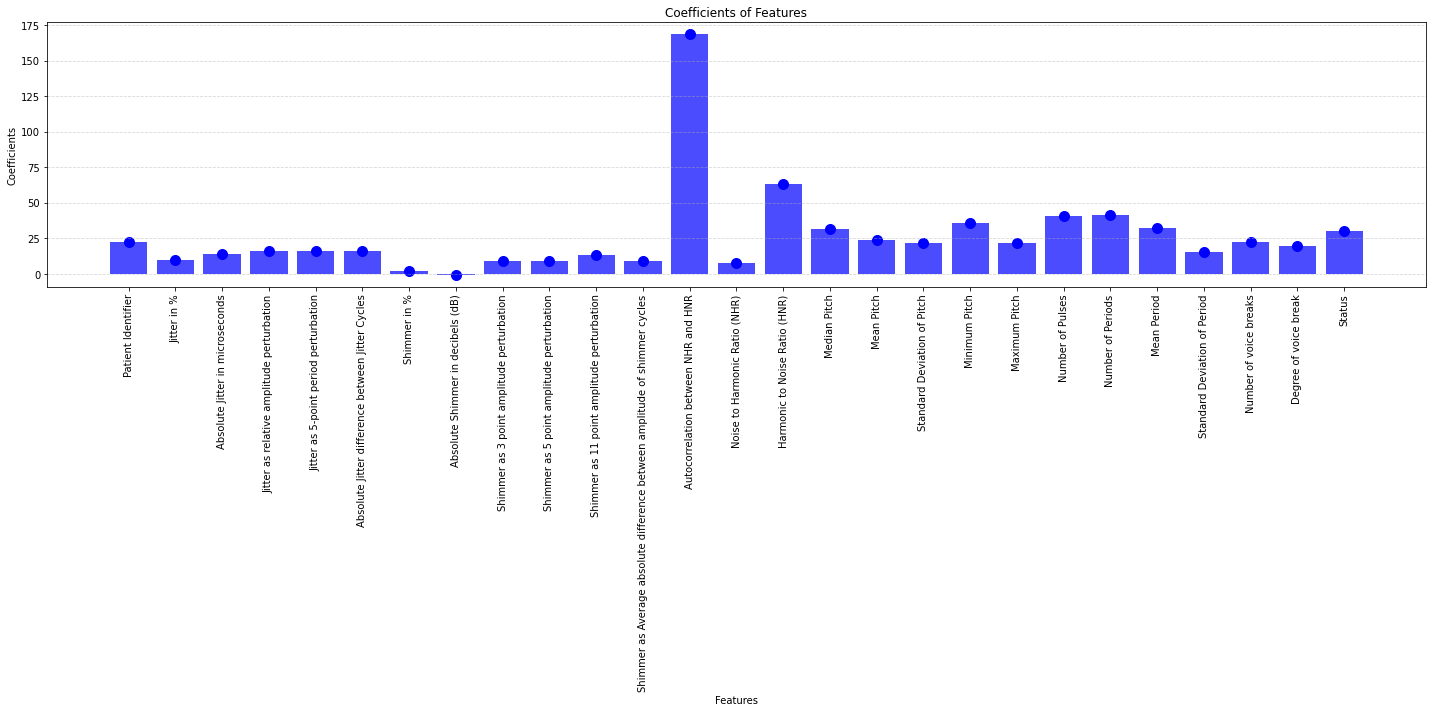

In [13]:
# Show and plot the values of the coefficients. Comment the results
import numpy as np
import matplotlib.pyplot as plt

# Create a bar plot or scatter plot
plt.figure(figsize=(20, 10))  # Optional: Adjust the figure size

# Bar plot
plt.bar(columns, coef_list, color='b', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features')
plt.xticks(rotation=90)  # Optional: Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Optional: Add a grid

# Scatter plot (alternative)
plt.scatter(columns, coef_list, color='b', s=100)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features')

plt.tight_layout()
plt.show()

It can be seen in the above graph that the most relevant feature is 'Absolute Jitter in microseconds'. Something that need to be stand out is that this procedure of analyzing the better estimators for out target variable is only valid when there are independent features, ergo, features that are low correlated between them. 

As it has been shown in Project 1 and in the following sections, this does not happen in our dataset, having groups of high correlated features. However, for this section, as it is not the main problem of our dataset, we are going to suppose that there are only indeendent features, leaving this concern for the following sections. 

**Normalizing and Shuffling the dataset**

We also normalize and shuffle the dataset in order to compare the results between giving as input a non-normalized dataset or feature and a normalized one.

In [14]:
# Normalizing both datasets
X_train_norm, y_train_shuf, X_test_norm, y_test_shuf = normalizing("rs", X_train, X_test, y_train, y_test)

# For train set
X_train_norm = pd.DataFrame(X_train_norm)
X_train_norm.columns = columns

# For test set
X_test_norm = pd.DataFrame(X_test_norm)
X_test_norm.columns = columns

### 2.2. Simple Linear Regression

Simple linear regression is a statistical technique used to model the relationship between two variables, where one variable (independent variable) is used to predict the values of another variable (dependent variable). In essence, it seeks to find the best-fitting straight line that describes the linear association between the two variables. The model assumes that this relationship can be represented by a linear equation, allowing for the estimation of coefficients that define the slope and y-intercept of the line. The objective is to minimize the difference between the predicted values from the model and the actual observed values of the target variable, providing a straightforward way to understand and make predictions based on a single input variable.

#### Following linear regression coefficients.

Seeing the previous graph, the variable which allows better estimation of the dependent variable would be **'Absolute Jitter in microseconds'** following the coefficients of each of the features.

In [15]:
coefficients, intercept, y_pred = lin_reg(X_train, y_train, X_test, feature='Absolute Jitter in microseconds')

Computing some figures of merit.

R-squared (R²): 0.07748420237393916
Mean Absolute Error (MAE): 15.079789258090036
Mean Squared Error (MSE): 316.09506681263395
Root Mean Squared Error (RMSE): 17.779062596566614


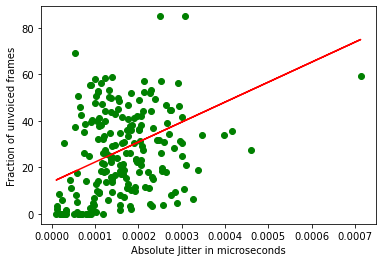

In [16]:
r2, mae, mse, rmse = fig_merit_lin(y_test, y_pred, feature='Absolute Jitter in microseconds')

Storing them in each of the lists.

In [17]:
r2_results.append(r2)
mae_results.append(mae)
mse_results.append(mse)
rmse_results.append(rmse)

#### Following correlation coefficients.

Seeing the correlation matrix presented in Project 1 and also below, the more correlated feature to the the dependent variable is **'Degree of voice break'**, even though the target variable has not high correlation with none of the features.

In [18]:
coefficients, intercept, y_pred = lin_reg(X_train, y_train, X_test, feature='Degree of voice break')

Computing some figures of merit.

R-squared (R²): 0.27520744941793274
Mean Absolute Error (MAE): 12.532641994818123
Mean Squared Error (MSE): 248.34626170207258
Root Mean Squared Error (RMSE): 15.75900573329652


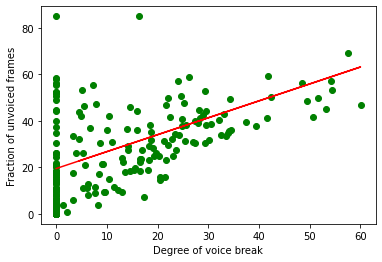

In [19]:
r2, mae, mse, rmse = fig_merit_lin(y_test, y_pred, feature='Degree of voice break')

Storing them in each of the lists.

In [20]:
r2_results.append(r2)
mae_results.append(mae)
mse_results.append(mse)
rmse_results.append(rmse)

### 2.3. Multivariable Linear Regression

Multiple variable regression, also known as multiple linear regression, extends simple linear regression by incorporating multiple independent variables to predict a single dependent variable. In your scenario, let's say you're using 10 features (independent variables) to estimate the target variable. The regression equation takes the form:

\[ Y = b_0 + b_1X_1 + b_2X_2 + \ldots + b_{10}X_{10} + \varepsilon \]

Here:
- \( Y \) is the target variable.
- \( X_1, X_2, \ldots, X_{10} \) are the 10 independent variables.
- \( b_0 \) is the y-intercept, and \( b_1, b_2, \ldots, b_{10} \) are the coefficients for each independent variable.
- \( \varepsilon \) is the error term.

This section is done with 10 different features, taken from the feature selection explained in the Parametric Classification section, comparing both cases, as well as the normilized and non-normalized datasets.

#### Multivariable LR with 10 features without normalizing

First we take the 10 variables which best estimates the target variable.

In [21]:
features = ['Maximum Pitch',
    'Absolute Jitter difference between Jitter Cycles',
    'Shimmer as 11 point amplitude perturbation',
    'Standard Deviation of Pitch',
    'Jitter as relative amplitude perturbation',
    'Median Pitch',
    'Standard Deviation of Period',
    'Mean Period',
    'Jitter as 5-point period perturbation',
    'Noise to Harmonic Ratio (NHR)']

To compute Linear Regression we call our function.

In [22]:
coefficients, intercept, y_pred = lin_reg(X_train[features], y_train, X_test[features])

We compute some figures of merit to evaluate and compare it with the following models.

In [23]:
r2, mae, mse, rmse = fig_merit_lin(y_test, y_pred)

R-squared (R²): 0.07652664912998064
Mean Absolute Error (MAE): 14.456636108740641
Mean Squared Error (MSE): 316.42316727162296
Root Mean Squared Error (RMSE): 17.788287361958794


Storing them in each of the lists.

In [24]:
r2_results.append(r2)
mae_results.append(mae)
mse_results.append(mse)
rmse_results.append(rmse)

#### Multivariable LR with 10 features without normalizing

Now normalizing we compute Linear Regression.

In [25]:
coefficients, intercept, y_pred = lin_reg(X_train_norm[features], y_train_shuf, X_test_norm[features])

We compute some figures of merit to evaluate and compare it with the following models.

In [26]:
r2, mae, mse, rmse = fig_merit_lin(y_test_shuf, y_pred)

R-squared (R²): 0.07652664912996388
Mean Absolute Error (MAE): 14.456636108740671
Mean Squared Error (MSE): 316.4231672716287
Root Mean Squared Error (RMSE): 17.788287361958954


Storing them in each of the lists.

In [27]:
r2_results.append(r2)
mae_results.append(mae)
mse_results.append(mse)
rmse_results.append(rmse)

#### Multivariable LR with all features without normalizing

We also perform it for all features of the dataset. Following with the procedure.

In [28]:
coefficients, intercept, y_pred = lin_reg(X_train, y_train, X_test)

We compute some figures of merit to evaluate and compare it with the following models.

In [29]:
r2, mae, mse, rmse = fig_merit_lin(y_test, y_pred)

R-squared (R²): -0.8054462003606067
Mean Absolute Error (MAE): 15.548127446849467
Mean Squared Error (MSE): 618.6264113830717
Root Mean Squared Error (RMSE): 24.87220157893289


Storing them in each of the lists.

In [30]:
r2_results.append(r2)
mae_results.append(mae)
mse_results.append(mse)
rmse_results.append(rmse)

#### Multivariable LR with all features after normalizing

Now normalizing we compute Linear Regression.

In [31]:
coefficients, intercept, y_pred = lin_reg(X_train_norm, y_train_shuf, X_test_norm)

We compute some figures of merit to evaluate and compare it with the following models.

In [32]:
r2, mae, mse, rmse = fig_merit_lin(y_test_shuf, y_pred)

R-squared (R²): -0.8054462003618137
Mean Absolute Error (MAE): 15.548127446875599
Mean Squared Error (MSE): 618.6264113834853
Root Mean Squared Error (RMSE): 24.872201578941205


Storing them in each of the lists.

In [33]:
r2_results.append(r2)
mae_results.append(mae)
mse_results.append(mse)
rmse_results.append(rmse)

### 2.4. Comparison of the results obtained with the different models for parametric regression

In [34]:
results = pd.DataFrame()

results["R2 in the test set"] = r2_results
results["MAE in the test set"] = mae_results
results["MSE in the test set"] = mse_results
results["RMSE in the test set"] = rmse_results

#results
results["Models"] = ["SLR for feature 'Absolute Jitter in microseconds'",
        "SLR for feature 'Degree of voice break'",
        "MLR with 10 features without normalizing",
        "MLR with 10 features after normalizing",
        "MLR with all features without normalizing",
        "MLR with all features after normalizing"
                    ]

results.set_index("Models", inplace = True)

In [35]:
results

,R2 in the test set,MAE in the test set,MSE in the test set,RMSE in the test set
Models,,,,
SLR for feature 'Absolute Jitter in microseconds',0.077484,15.079789,316.095067,17.779063
SLR for feature 'Degree of voice break',0.275207,12.532642,248.346262,15.759006
MLR with 10 features without normalizing,0.076527,14.456636,316.423167,17.788287
MLR with 10 features after normalizing,0.076527,14.456636,316.423167,17.788287
MLR with all features without normalizing,-0.805446,15.548127,618.626411,24.872202
MLR with all features after normalizing,-0.805446,15.548127,618.626411,24.872202


**Observations**: 

- In the case of Simple Linear Regression normalization will not have any effect (increase or decrease) on the estimation of the target variable, as the model is trained with a single feature. This is not tested here, but in the following sections.
    
    For this case, it has been seen that 'Degree od voice break' estimates better than 'Absolute Jitter in microseconds', which states that the correlation coefficients is a more consistent procedure than the regression coefficients, for this case. Remember that the linear coefficients approach only makes sense when having independent features, ergo, non-correlated variables, something that is not accomplish in our dataset.
    
   
   
   
- In the case of Multivariable Linear Regression, for both cases, the results follow our hypothesis. They are unsatisfactory results as the concern in this dataset is not regression, but classification.
    
    Another point worth mentioning is that the results are better when using 10 than all the features, which could be due to several concerns, being the most important one the explained above.

## 3. Parametric Binary Classification

Parametric classification, specifically in the context of logistic regression, is a statistical method used for binary classification tasks, where the goal is to categorize observations into one of two classes. Logistic regression is a parametric model that assumes a linear relationship between the independent variables and the log-odds of the probability of belonging to a particular class. The logistic function, or sigmoid function, is employed to map the linear combination of features to a range between 0 and 1, representing the probability of the positive class. The model estimates coefficients that define the linear boundary between the two classes. Training involves optimizing these coefficients to maximize the likelihood of the observed class labels given the input features. Logistic regression is a widely used parametric classification algorithm due to its simplicity, interpretability, and effectiveness, especially in scenarios with a binary outcome.

Now we can start with what is supposed to work for our dataset, classification algorithms,specifically logistic regression, in order to classify between our both classes for the target variable **'status'**, which are PD patients and healthy.

Before starting with this section we define some figures of merit to evaluate the model:

- **Accuracy Scores:** Accuracy measures the proportion of correctly classified instances out of the total instances. It provides an overall assessment of the model's correctness in predicting both positive and negative instances.

- **Sensitivity Scores:** Sensitivity (or recall) measures the proportion of actual positive instances correctly identified by the model. It is particularly relevant when the cost of false negatives (missing a positive instance) is high.

- **Specificity Scores:** Specificity measures the proportion of actual negative instances correctly identified by the model. It is crucial when the cost of false positives (incorrectly identifying a negative instance as positive) is a concern.

- **AUC Scores:** AUC (Area Under the Receiver Operating Characteristic curve) summarizes the model's ability to distinguish between the two classes across different probability thresholds. A higher AUC score indicates better overall performance, reflecting the model's ability to rank instances by their likelihood of belonging to the positive class.

In [36]:
accuracy_scores = []
sensitivity_scores = []
specificity_scores = []
auc_scores = []

### 3.1. Dataset import

First of all, we import the clean dataset we obtained in Project 1, which was already split in train and test, but without normalizing it. In this case we are going to use the one for binary classification, but as said before changing the target variable for 'Fraction of unvoiced frames'.

In [37]:
# Import train set
train = pd.read_csv('train_data_bcl.csv')
# Import test set
test = pd.read_csv('test_data_bcl.csv')

Now divide each of the sets in features and target variable.

In [38]:
# Divide train set in features and target variable
X_train, y_train = (train.drop('Status', axis=1), train['Status'])
# Divide test set in features and target variable
X_test, y_test = (test.drop('Status', axis=1), test['Status'])

Finally, we can show each of the sets.

In [39]:
# Show features for training set
X_train.head(5)

,Patient Identifier,Jitter in %,Absolute Jitter in microseconds,Jitter as relative amplitude perturbation,Jitter as 5-point period perturbation,Absolute Jitter difference between Jitter Cycles,Shimmer in %,Absolute Shimmer in decibels (dB),Shimmer as 3 point amplitude perturbation,Shimmer as 5 point amplitude perturbation,...,Standard Deviation of Pitch,Minimum Pitch,Maximum Pitch,Number of Pulses,Number of Periods,Mean Period,Standard Deviation of Period,Fraction of unvoiced frames,Number of voice breaks,Degree of voice break
0,1.0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,10.421,142.229,187.576,160.0,159.000000,0.006065,0.000416,0.000,0.0,0.000
1,1.0,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,14.773,159.515,234.505,170.0,169.000000,0.005181,0.000403,2.247,0.0,0.000
2,1.0,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,12.981,146.445,211.442,171.5,169.384615,0.006071,0.000474,10.656,1.0,0.178
3,1.0,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,10.853,182.713,220.230,94.0,92.000000,0.004910,0.000320,0.000,0.0,0.000
4,1.0,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,11.499,182.821,225.162,117.0,114.000000,0.004757,0.000380,18.182,1.0,13.318


In [40]:
# Show features for test set
X_test.head(5)

,Patient Identifier,Jitter in %,Absolute Jitter in microseconds,Jitter as relative amplitude perturbation,Jitter as 5-point period perturbation,Absolute Jitter difference between Jitter Cycles,Shimmer in %,Absolute Shimmer in decibels (dB),Shimmer as 3 point amplitude perturbation,Shimmer as 5 point amplitude perturbation,...,Standard Deviation of Pitch,Minimum Pitch,Maximum Pitch,Number of Pulses,Number of Periods,Mean Period,Standard Deviation of Period,Fraction of unvoiced frames,Number of voice breaks,Degree of voice break
0,5.0,0.695,0.000057,0.386,0.394,1.159,17.582,1.593,9.968,11.287,...,4.351,112.758,129.860,163.0,162.0,0.008237,0.000299,0.752,0.0,0.000
1,5.0,0.395,0.000034,0.223,0.233,0.669,8.957,0.786,5.278,4.991,...,1.255,115.090,120.445,119.0,118.0,0.008493,0.000093,0.000,0.0,0.000
2,5.0,0.838,0.000069,0.494,0.450,1.483,12.526,1.202,6.560,7.717,...,3.778,108.345,124.431,140.0,139.0,0.008290,0.000273,0.000,0.0,0.000
3,5.0,3.594,0.000305,1.648,1.977,4.943,15.248,1.360,4.890,10.720,...,7.764,105.789,127.848,28.0,27.0,0.008490,0.000672,10.714,0.0,0.000
4,5.0,3.450,0.000295,1.300,1.409,3.899,16.130,1.673,7.769,14.318,...,13.411,97.686,153.275,36.0,34.0,0.008558,0.001041,31.373,1.0,21.216


In [41]:
# Show target variable for train set
y_train.head(5)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Status, dtype: float64

In [42]:
# Show target variable for test set
y_test.head(5)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Status, dtype: float64

In order to perform what is asked we create a personalized function, that will also help us for the rest of the section.

In [43]:
def log_reg(X_train, y_train, X_test, feature=None, penalty=None, param_grid=None):
    """
    Perform logistic regression with optional regularization using L1, L2, or ElasticNet penalties.

    Parameters:
    - X_train (array-like): Training feature dataset.
    - y_train (array-like): Training target variable.
    - X_test (array-like): Testing feature dataset.
    - feature (str): If specified, train and predict using only the selected feature.
    - penalty (str): If specified, apply regularization with options 'l1' for L1 penalty, 'l2' for L2 penalty,
                    or 'elasticnet' for ElasticNet penalty.
    - param_grid (dict): If specified, perform grid search with cross-validation using the given parameter grid.

    Returns:
    Depending on the provided parameters:
    - If feature is None and param_grid is None: Tuple containing the intercept, coefficients, predicted labels, and predicted probabilities.
    - If feature is None and param_grid is specified: Tuple containing the best parameters, best score, predicted labels, and predicted probabilities.
    - If feature is specified: Tuple containing the intercept, coefficient, predicted labels, and predicted probabilities for the selected feature.
    """

    # Logistic regression with optional regularization
    if penalty == None:
        model = LogisticRegression(solver='liblinear')
    elif penalty == 'l1':
        model = LogisticRegression(solver='saga', penalty='l1')
    elif penalty == 'l2':
        model = LogisticRegression(solver='saga', penalty='l2')
    elif penalty == 'elasticnet':
        model = LogisticRegression(solver='saga', penalty='l2')
    else:
        print('Please choose an accepeted penalty [l1, l2 or elasticnet].')
    
    if feature == None:
        if param_grid == None:
            # Train the model using X_train as the input
            model = model.fit(X_train, y_train)

            # Predict the values using the test set. Obtain both the hard and the soft output
            y_pred = model.predict(X_test)
            y_prob_pred = model.predict_proba(X_test)
            
            # Show the intercept
            intercept = model.intercept_
            #print(intercept)

            # Show the coefficients
            coefficients = model.coef_
            #print(coefficients)

            return coefficients[0], intercept, y_pred, y_prob_pred
            
        else:
            # Perform grid search with cross-validation
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

            # Fit the grid search to your training data
            grid_search.fit(X_train, y_train)  # Replace X_train and y_train with your training data
            
            # Predict using the model with the best parameters
            y_pred = grid_search.best_estimator_.predict(X_test)
            y_prob_pred = grid_search.best_estimator_.predict_proba(X_test)

            # Get the best parameters and best score
            best_params = grid_search.best_params_
            best_score = grid_search.best_score_
            
            return best_params, best_score, y_pred, y_prob_pred
            
    else:
        # Train the model using X_train using only the feature that best estimates the target variable as the input
        model = model.fit(np.array(X_train[feature]).reshape(-1, 1), y_train)
        
        # Predict the values using the test set. Obtain both the hard and the soft output
        y_pred = model.predict(np.array(X_test[feature]).reshape(-1,1))
        y_prob_pred = model.predict_proba(np.array(X_test[feature]).reshape(-1,1))
        
        # Show the intercept
        intercept = model.intercept_
        #print(intercept)

        # Show the coefficients
        coefficients = model.coef_
        #print(coefficients)

        return coefficients[0][0], intercept[0], y_pred, y_prob_pred

Also, for the metrics we will create another function.

In [44]:
def fig_merit_log(y_test, y_pred, y_prob_pred):
    """
    Compute and print various figures of merit for logistic regression predictions, including confusion matrix,
    accuracy, sensitivity (recall), classification report, ROC AUC score, and ROC curve.

    Parameters:
    - y_test (array-like): True values of the target variable.
    - y_pred (array-like): Predicted labels of the target variable.
    - y_prob_pred (array-like): Predicted probabilities for positive class of the target variable.

    Returns:
    Tuple containing accuracy, sensitivity, and ROC AUC score.
    """

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(f'tn: {cm[1][1]}, fp:{cm[0][1]}, fn:{cm[1][0]}, tp:{cm[0][0]}')

    # Compute the accuracy
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    print("Accuracy:", accuracy)

    # Compute sensitivity (recall)
    sensitivity = round(recall_score(y_test, y_pred), 2)
    print("Sensitivity (Recall):", sensitivity)

    # Generate the classification report
    report = classification_report(y_test, y_pred, target_names=['Non-diabetic', 'Diabetic'])
    print(report)

    # Compute the AUC and the ROC
    roc_auc = round(roc_auc_score(y_test, y_pred), 2)
    print("ROC AUC Score:", roc_auc)

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob_pred[:, 1])

    # Plot the ROC curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    return accuracy, sensitivity, roc_auc

Now we can analyze the most relevant features regarding the estimation of the target variable, 'Status'. In order to so, we make simple linear regression wut every feature, and then graph the coeficients in a bar plot.

In [45]:
columns = X_train.columns

coefficients = []
intercepts = []

for feature in columns:
    lr = log_reg(X_train, y_train, X_test, feature=feature)
    coefficients.append(lr[0])
    intercepts.append(lr[1])

Plotting the coefficients.

<ipython-input-46-dab42080b21a>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


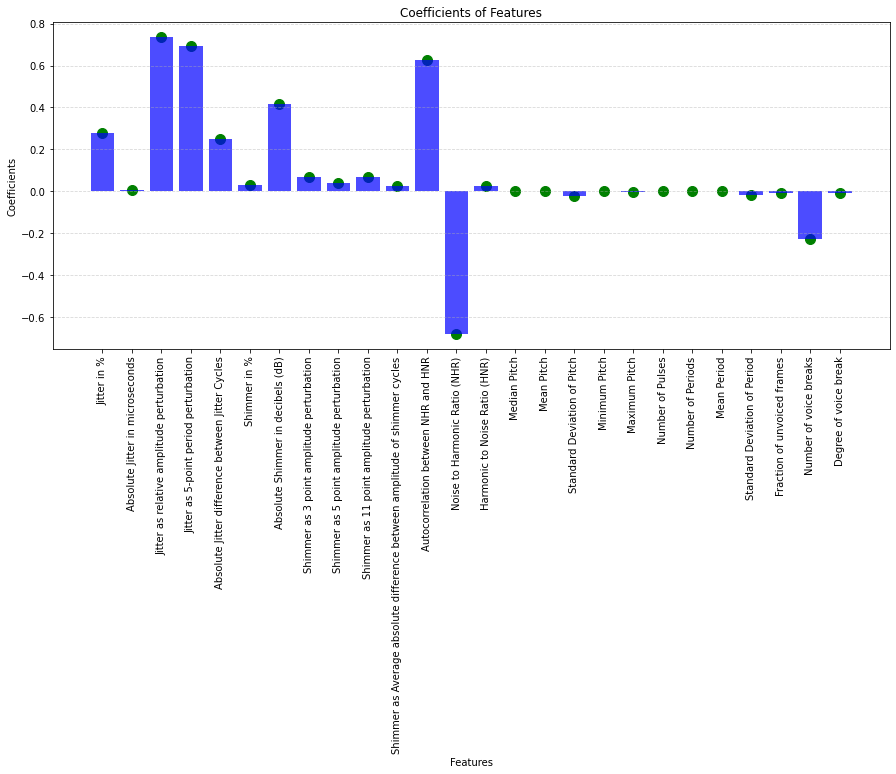

In [46]:
# Create a bar plot or scatter plot
plt.figure(figsize=(15, 6))  # Optional: Adjust the figure size

# Bar plot
plt.bar(columns[1:], coefficients[1:], color='b', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features')
plt.xticks(rotation=90)  # Optional: Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Optional: Add a grid

# Scatter plot (alternative)
plt.scatter(columns[1:], coefficients[1:], color='g', s=100)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features')

plt.tight_layout()
plt.show()

**Observations**: As said before, as we have groups of high correlated features, the one that allows better estimation of the target variable cannot be chosed following this procedure. 

Thus, in the following sections, two different (compatible) methods are going to be followed in order to perform feature selection:
- Tree classifier and Select from model in order to compute the importance of each feature.
- Correlation coefficients.

**Normalizing and Shuffling the dataset**

We also normalize and shuffle the dataset in order to compare the results between giving as input a non-normalized dataset or feature and a normalized one.

In [47]:
# Normalizing both datasets
X_train_norm, y_train_shuf, X_test_norm, y_test_shuf = normalizing("ss", X_train, X_test, y_train, y_test)

# For train set
X_train_norm = pd.DataFrame(X_train_norm)
X_train_norm.columns = columns

# For test set
X_test_norm = pd.DataFrame(X_test_norm)
X_test_norm.columns = columns

### 3.2. Simple Logistic Regression for Binarty Classification

Simple logistic regression is a statistical technique used for binary classification when there is a single independent variable. The objective is to model the relationship between this one independent variable and the probability of an observation belonging to a particular binary outcome, typically coded as 0 or 1. The logistic regression model utilizes the logistic function (or sigmoid function) to map a linear combination of the independent variable to a range between 0 and 1. 

The logistic function is defined as \( P(Y=1) = \frac{1}{1 + e^{-(b_0 + b_1X)}} \), where \( P(Y=1) \) is the probability of the positive outcome, \( X \) is the independent variable, and \( b_0 \) and \( b_1 \) are the coefficients to be estimated.

The coefficients are determined through a process called maximum likelihood estimation during model training. The logistic regression model is particularly useful for binary classification problems when dealing with a single input variable.

First of all we make Logistic Regression with a unique variable. In order to perform this task, we need to look for the variable which gives the best estimate of the target variable.

#### Feature Selection I: Tree classifier for feature importances.

The initial steps for the first procedure of feature selection involve extracting Patient Identifiers from both the training and test datasets and temporarily removing these columns. This is done to ensure that the identifiers do not influence the feature importance calculations.

The primary focus of the feature selection process lies in the utilization of an `ExtraTreesClassifier`, which is a tree-based classifier. The classifier is trained on the training data (`X_train` and `y_train`) with the aim of assessing the importance of each feature in predicting the target variable.

Following the training of the classifier, feature importances are computed. Each feature is assigned an importance score, indicating its contribution to the predictive performance of the classifier. This information is crucial for identifying which features play a significant role in the classification task.

To address concerns about high correlated variables that might impact subsequent regression procedures, features are selected based on their importance scores. This selection is facilitated by creating a `SelectFromModel` instance using the trained classifier. The chosen features are then used to transform the training data, providing a subset that is deemed most relevant for further analysis.

In addition to selecting features, the code also collects and stores the feature importances in a dictionary, associating each feature's name with its respective importance score. This information can be valuable for understanding the relative significance of different features in the dataset. Overall, this feature selection process helps streamline the dataset by focusing on the most informative variables, potentially improving model interpretability and performance.

We take out Patient Identifier, but without eliminating it. Taking into account the concern explained in Project 1, we store it in a variable.

In [48]:
# For dataset without normalization
# For train
patient_id_train = X_train['Patient Identifier']
patient_id_train.columns = 'Patient Identifier'
X_train = X_train.drop('Patient Identifier', axis=1)
# For test
patient_id_test = X_test['Patient Identifier']
patient_id_test.columns = 'Patient Identifier'
X_test = X_test.drop('Patient Identifier', axis=1)

In [49]:
# For dataset after normalization
# For train
patient_id_train_norm = X_train_norm['Patient Identifier']
patient_id_train_norm.columns = 'Patient Identifier'
X_train_norm = X_train_norm.drop('Patient Identifier', axis=1)
# For test
patient_id_test_norm = X_test_norm['Patient Identifier']
patient_id_test_norm.columns = 'Patient Identifier'
X_test_norm = X_test_norm.drop('Patient Identifier', axis=1)

Now compute the importance of each feature.

In [50]:
# Create and fit the classifier
clf = ExtraTreesClassifier(n_estimators=50, random_state=10)
clf = clf.fit(X_train, y_train)

# Create and fit SelectFromModel with feature names
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)

# Get feature importances for all features
importances = dict(zip(X_train.columns, clf.feature_importances_))

C:\Users\enriq\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


And we show the results.

In [51]:
# Find the maximum width of the keys for formatting
max_key_width = max(map(len, importances.keys()))

for key, value in importances.items():
    print(f"{key.ljust(max_key_width)}  {value}")

Jitter in %                                                                 0.03579413450238681
Absolute Jitter in microseconds                                             0.03336981783417484
Jitter as relative amplitude perturbation                                   0.045234080649420125
Jitter as 5-point period perturbation                                       0.04136025229007165
Absolute Jitter difference between Jitter Cycles                            0.04824149596390974
Shimmer in %                                                                0.033401731466518675
Absolute Shimmer in decibels (dB)                                           0.034519485263247336
Shimmer as 3 point amplitude perturbation                                   0.032821335206778574
Shimmer as 5 point amplitude perturbation                                   0.03807199759509046
Shimmer as 11 point amplitude perturbation                                  0.04652225492088522
Shimmer as Average absolute differen

We can create a function in order to choose the most important features.

In [52]:
def top_features(features_dict, n):
    """
    Get the top N features based on their importance scores.

    Parameters:
    - features_dict (dict): Dictionary containing feature names as keys and their importance scores as values.
    - n (int): Number of top features to retrieve.

    Returns:
    List of the top N features.
    """
    sorted_keys = sorted(features_dict, key=features_dict.get, reverse=True)
    return sorted_keys[:n]

In [53]:
feature = top_features(importances, 1)
print(feature)

['Maximum Pitch']


#### Simple Logistic Regression without normalization

Following with the Logistic Regression, we call the previous function defined, choosing the variable "Maximum Pitch" as it is the one that best estimates the model.

In [54]:
coefficients, intercept, y_pred, y_prob_pred = log_reg(X_train, y_train, X_test, feature=feature[0])

We compute some figures of merit to evaluate and compare it with the following models.

[[62 42]
 [29 75]]
tn: 75, fp:42, fn:29, tp:62
Accuracy: 0.66
Sensitivity (Recall): 0.72
              precision    recall  f1-score   support

Non-diabetic       0.68      0.60      0.64       104
    Diabetic       0.64      0.72      0.68       104

    accuracy                           0.66       208
   macro avg       0.66      0.66      0.66       208
weighted avg       0.66      0.66      0.66       208

ROC AUC Score: 0.66


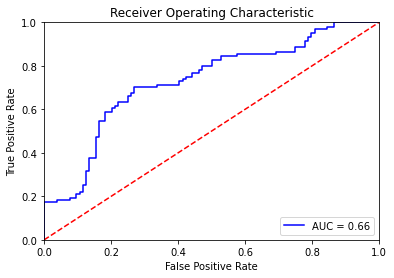

In [55]:
acc, sen, auc = fig_merit_log(y_test, y_pred, y_prob_pred)

Finally, store the figures of merit in each of the lists.

In [56]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

#### Simple Logistic Regression with normalization

With the normalized dataset, we compute simple logistic regression, with the same feature as before.

In [57]:
coefficients, intercept, y_pred, y_prob_pred = log_reg(X_train_norm, y_train_shuf, X_test_norm, feature=feature[0])

We compute some figures of merit to evaluate and compare it with the following models.

[[62 42]
 [28 76]]
tn: 76, fp:42, fn:28, tp:62
Accuracy: 0.66
Sensitivity (Recall): 0.73
              precision    recall  f1-score   support

Non-diabetic       0.69      0.60      0.64       104
    Diabetic       0.64      0.73      0.68       104

    accuracy                           0.66       208
   macro avg       0.67      0.66      0.66       208
weighted avg       0.67      0.66      0.66       208

ROC AUC Score: 0.66


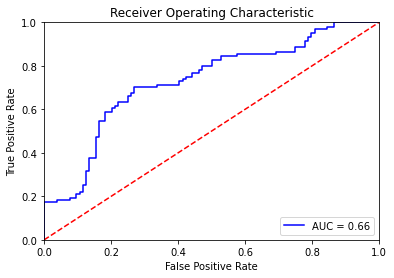

In [58]:
acc, sen, auc = fig_merit_log(y_test_shuf, y_pred, y_prob_pred)

Finally, store the figures of merit in each of the lists.

In [59]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

### 3.3. Multivariable Logistic Regression for Binarty Classification

Multivariable logistic regression, also known as multiple logistic regression, is an extension of simple logistic regression to cases where there are multiple independent variables. It is used for binary classification problems, where the goal is to predict the probability of an observation belonging to a particular category (usually coded as 0 or 1).

In the multivariable logistic regression model, the relationship between the independent variables and the log-odds of the probability of the event occurring is modeled. The logistic function (sigmoid function) is then applied to transform the linear combination of these independent variables into probabilities.

The logistic regression model estimates the coefficients through a process called maximum likelihood estimation during the training phase. The coefficients represent the log-odds of the event occurring for a one-unit change in the corresponding independent variable, while keeping other variables constant.

Multivariable logistic regression is a powerful tool for modeling complex relationships in datasets with multiple predictors and is widely used in various fields for binary classification tasks.

In order to perform multivariable LR we will repeat this section with a different number of variables to draw valid conclusions.

The variables for each repetition will be chosen regarding the previous computation of the feature importance. Also, normalization will be needed as now we are using more than one feature. In addition, results have shown that after applying normalization the model estimates better the target variable, having better results.

As in some of the next sections we will need to use the patient identifier column we introduce back to both sets, train and test.

In [60]:
# Storing the columns in an variable
columns = X_train.columns
# Insert 'Patient Identifier' at the beginning of the list
columns = columns.insert(0, 'Patient Identifier')

In [61]:
# For the non-normalized
# For train set
X_train = pd.concat([patient_id_train, X_train], ignore_index=True, axis=1)
X_train.columns = columns
# For test set
X_test = pd.concat([patient_id_test, X_test], ignore_index=True, axis=1)
X_test.columns = columns

In [62]:
# For the normalized
# For train set
X_train_norm = pd.concat([patient_id_train_norm, X_train_norm], ignore_index=True, axis=1)
X_train_norm.columns = columns
# For test set
X_test_norm = pd.concat([patient_id_test_norm, X_test_norm], ignore_index=True, axis=1)
X_test_norm.columns = columns

#### Multivariable LR with 5 features without normalizing

First we take the 5 variables which best estimates the target variable.

In [63]:
# Computing the 5 features which best estimates the target variable.
features = top_features(importances, 5)
# Showing the features
for feature in features:
    print(feature)

Maximum Pitch
Absolute Jitter difference between Jitter Cycles
Shimmer as 11 point amplitude perturbation
Standard Deviation of Pitch
Jitter as relative amplitude perturbation


To compute Logistic Regression we call our function.

In [64]:
coefficients, intercept, y_pred, y_prob_pred = log_reg(X_train[features], y_train, X_test[features])

We compute some figures of merit to evaluate and compare it with the following models.

[[73 31]
 [59 45]]
tn: 45, fp:31, fn:59, tp:73
Accuracy: 0.57
Sensitivity (Recall): 0.43
              precision    recall  f1-score   support

Non-diabetic       0.55      0.70      0.62       104
    Diabetic       0.59      0.43      0.50       104

    accuracy                           0.57       208
   macro avg       0.57      0.57      0.56       208
weighted avg       0.57      0.57      0.56       208

ROC AUC Score: 0.57


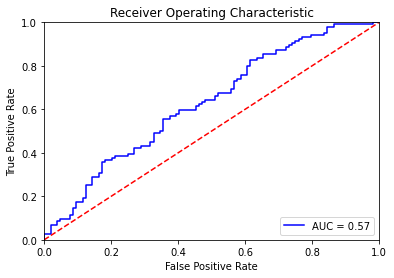

In [65]:
acc, sen, auc = fig_merit_log(y_test, y_pred, y_prob_pred)

Finally, store the figures of merit in each of the lists.

In [66]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

#### Multivariable LR with 5 features after normalizing

Now normalizing we compute Logistic Regression.

In [67]:
coefficients, intercept, y_pred, y_prob_pred = log_reg(X_train_norm[features], y_train_shuf, X_test_norm[features])

We compute some figures of merit to evaluate and compare it with the following models.

[[74 30]
 [59 45]]
tn: 45, fp:30, fn:59, tp:74
Accuracy: 0.57
Sensitivity (Recall): 0.43
              precision    recall  f1-score   support

Non-diabetic       0.56      0.71      0.62       104
    Diabetic       0.60      0.43      0.50       104

    accuracy                           0.57       208
   macro avg       0.58      0.57      0.56       208
weighted avg       0.58      0.57      0.56       208

ROC AUC Score: 0.57


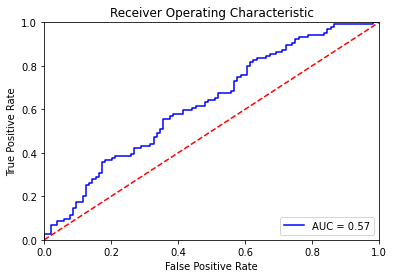

In [68]:
acc, sen, auc = fig_merit_log(y_test_shuf, y_pred, y_prob_pred)

Finally, store the figures of merit in each of the lists.

In [69]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

**Observations**: No change.

#### Multivariable LR with 15 features without normalizing

Now we take the 15 variables which best estimates the target variable.

In [70]:
# Computing the 5 features which best estimates the target variable.
features = top_features(importances, 15)
# Showing the features
for feature in features:
    print(feature)

Maximum Pitch
Absolute Jitter difference between Jitter Cycles
Shimmer as 11 point amplitude perturbation
Standard Deviation of Pitch
Jitter as relative amplitude perturbation
Median Pitch
Standard Deviation of Period
Mean Period
Jitter as 5-point period perturbation
Noise to Harmonic Ratio (NHR)
Mean Pitch
Fraction of unvoiced frames
Autocorrelation between NHR and HNR
Shimmer as 5 point amplitude perturbation
Harmonic to Noise Ratio (HNR)


To compute Logistic Regression we call our function.

In [71]:
coefficients, intercept, y_pred, y_prob_pred = log_reg(X_train[features], y_train, X_test[features])

We compute some figures of merit to evaluate and compare it with the following models.

[[66 38]
 [52 52]]
tn: 52, fp:38, fn:52, tp:66
Accuracy: 0.57
Sensitivity (Recall): 0.5
              precision    recall  f1-score   support

Non-diabetic       0.56      0.63      0.59       104
    Diabetic       0.58      0.50      0.54       104

    accuracy                           0.57       208
   macro avg       0.57      0.57      0.57       208
weighted avg       0.57      0.57      0.57       208

ROC AUC Score: 0.57


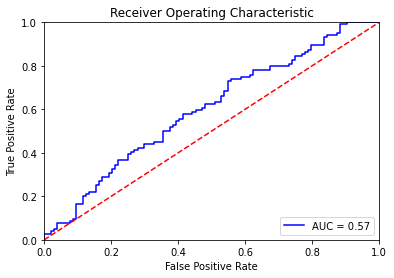

In [72]:
acc, sen, auc = fig_merit_log(y_test, y_pred, y_prob_pred)

Finally, store the figures of merit in each of the lists.

In [73]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

#### Multivariable LR with 15 features after normalizing

Now normalizing we compute Logistic Regression.

In [74]:
coefficients, intercept, y_pred, y_prob_pred = log_reg(X_train_norm[features], y_train_shuf, X_test_norm[features])

We compute some figures of merit to evaluate and compare it with the following models.

[[67 37]
 [67 37]]
tn: 37, fp:37, fn:67, tp:67
Accuracy: 0.5
Sensitivity (Recall): 0.36
              precision    recall  f1-score   support

Non-diabetic       0.50      0.64      0.56       104
    Diabetic       0.50      0.36      0.42       104

    accuracy                           0.50       208
   macro avg       0.50      0.50      0.49       208
weighted avg       0.50      0.50      0.49       208

ROC AUC Score: 0.5


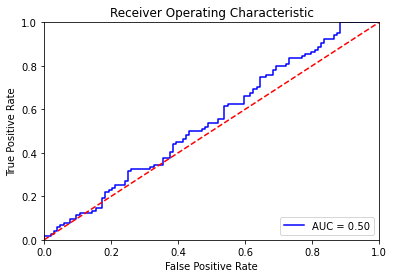

In [75]:
acc, sen, auc = fig_merit_log(y_test_shuf, y_pred, y_prob_pred)

Finally, store the figures of merit in each of the lists.

In [76]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

#### Multivariable LR with all features without normalizing

We also perform it for all features of the dataset. Following with the procedure.

In [77]:
coefficients, intercept, y_pred, y_prob_pred = log_reg(X_train, y_train, X_test)

We compute some figures of merit to evaluate and compare it with the following models.

[[ 97   7]
 [  3 101]]
tn: 101, fp:7, fn:3, tp:97
Accuracy: 0.95
Sensitivity (Recall): 0.97
              precision    recall  f1-score   support

Non-diabetic       0.97      0.93      0.95       104
    Diabetic       0.94      0.97      0.95       104

    accuracy                           0.95       208
   macro avg       0.95      0.95      0.95       208
weighted avg       0.95      0.95      0.95       208

ROC AUC Score: 0.95


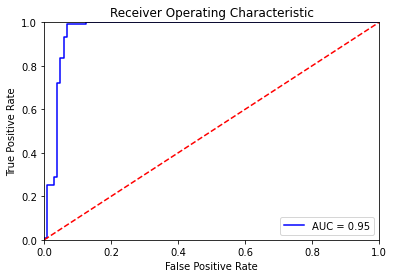

In [78]:
acc, sen, auc = fig_merit_log(y_test, y_pred, y_prob_pred)

Finally, store the figures of merit in each of the lists.

In [79]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

#### Multivariable LR with all features after normalizing

Now normalizing we compute Logistic Regression.

In [80]:
coefficients, intercept, y_pred, y_prob_pred = log_reg(X_train_norm, y_train_shuf, X_test_norm)

We compute some figures of merit to evaluate and compare it with the following models.

[[102   2]
 [  3 101]]
tn: 101, fp:2, fn:3, tp:102
Accuracy: 0.98
Sensitivity (Recall): 0.97
              precision    recall  f1-score   support

Non-diabetic       0.97      0.98      0.98       104
    Diabetic       0.98      0.97      0.98       104

    accuracy                           0.98       208
   macro avg       0.98      0.98      0.98       208
weighted avg       0.98      0.98      0.98       208

ROC AUC Score: 0.98


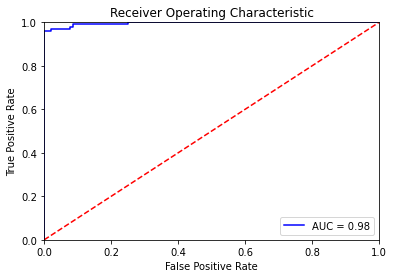

In [81]:
acc, sen, auc = fig_merit_log(y_test_shuf, y_pred, y_prob_pred)

Finally, store the figures of merit in each of the lists.

In [82]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

#### Multivariable LR with all features except Patient Identifier without normalizing

Now we perform it for all features of the dataset except Patient Identifier following the same procedure, but first eliminating this feature again from both sets.

In [83]:
# For train
X_train = X_train.drop('Patient Identifier', axis=1)
# For test
X_test = X_test.drop('Patient Identifier', axis=1)

Following with the procedure.

In [84]:
coefficients, intercept, y_pred, y_prob_pred = log_reg(X_train, y_train, X_test)

We compute some figures of merit to evaluate and compare it with the following models.

[[72 32]
 [53 51]]
tn: 51, fp:32, fn:53, tp:72
Accuracy: 0.59
Sensitivity (Recall): 0.49
              precision    recall  f1-score   support

Non-diabetic       0.58      0.69      0.63       104
    Diabetic       0.61      0.49      0.55       104

    accuracy                           0.59       208
   macro avg       0.60      0.59      0.59       208
weighted avg       0.60      0.59      0.59       208

ROC AUC Score: 0.59


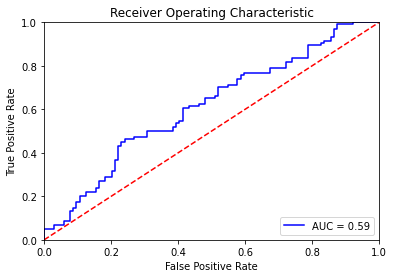

In [85]:
acc, sen, auc = fig_merit_log(y_test, y_pred, y_prob_pred)

Finally, store the figures of merit in each of the lists.

In [86]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

#### Multivariable LR with all features except Patient Identifier after normalizing

Now we perform it for all features of the dataset except Patient Identifier following the same procedure, but first eliminating this feature again from both sets.

In [87]:
# For train
X_train_norm = X_train_norm.drop('Patient Identifier', axis=1)
# For test
X_test_norm = X_test_norm.drop('Patient Identifier', axis=1)

Following with the procedure.

In [88]:
coefficients, intercept, y_pred, y_prob_pred = log_reg(X_train_norm, y_train_shuf, X_test_norm)

We compute some figures of merit to evaluate and compare it with the following models.

[[76 28]
 [62 42]]
tn: 42, fp:28, fn:62, tp:76
Accuracy: 0.57
Sensitivity (Recall): 0.4
              precision    recall  f1-score   support

Non-diabetic       0.55      0.73      0.63       104
    Diabetic       0.60      0.40      0.48       104

    accuracy                           0.57       208
   macro avg       0.58      0.57      0.56       208
weighted avg       0.58      0.57      0.56       208

ROC AUC Score: 0.57


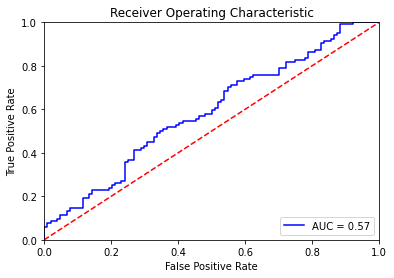

In [89]:
acc, sen, auc = fig_merit_log(y_test_shuf, y_pred, y_prob_pred)

Finally, store the figures of merit in each of the lists.

In [90]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

#### Multivariable LR after Feature Selection II: Correlation between features and their importance regarding the estimation of the target variable.

Finally, we make Multivariable LR after applying feature selection (next step of the previous one) taking into account the correlation between features which was stand out in Project 1. We know that there are groups of features which are highly correlated among them. 

Thus, first the correlation matrix is shown again, in order to understand the relation between features.

<AxesSubplot:>

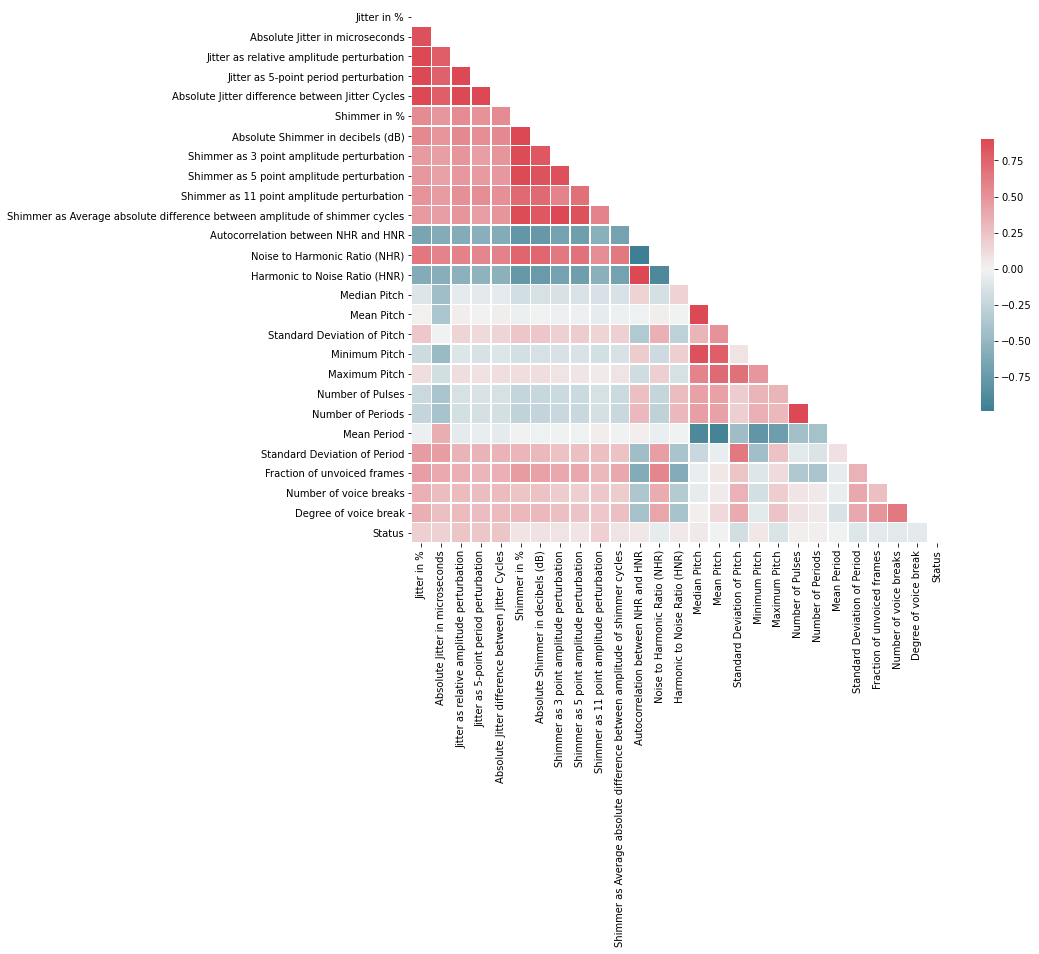

In [91]:
# We ignore the first column as it is like a patient id
df_corr = train.drop(["Patient Identifier"], axis=1)

# Compute the correlation matrix
corr = df_corr.corr()

# Gnerate a mask with numpy that ignores the superior triangular part (as it is symetrical) and the diagonal
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Prepare the figure with Matplotlib
f, ax = plt.subplots(figsize=(12, 10))

# Generate a colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We compute different groups of features which have high correletion between them.

In [92]:
# Creamos una lista con las columnas/características
columns = list(X_train.columns)

# Creamos un diccionario para almacenar los grupos de columnas altamente correlacionadas
correlation_groups = {}

# Iteramos sobre las columnas de la lista creada previamente
for column in columns:
    
    # Flag para indicar si la columna está asignada a un grupo existente
    assigned_to_group = False
    
    # Iteramos sobre los grupos existentes
    for group, group_columns in correlation_groups.items():
        
        # Calculamos la correlación promedio entre la columna actual y las columnas del grupo
        avg_correlation = sum(X_train[column].corr(X_train[col]) for col in group_columns) / len(group_columns)
        
        # Si la correlación promedio es mayor que un umbral, asignamos la columna al grupo
        if avg_correlation > 0.8:
            correlation_groups[group].append(column)
            assigned_to_group = True
            break
    
    # Si la columna no se asigna a un grupo existente, creamos un nuevo grupo
    if not assigned_to_group:
        correlation_groups[column] = [column]

The different groups can be showed.

In [93]:
# Showing the resulting groups
for i, (group, group_columns) in enumerate(correlation_groups.items()):
    print(f"\n{i+1} Group {group}: {group_columns}")


1 Group Jitter in %: ['Jitter in %', 'Absolute Jitter in microseconds', 'Jitter as relative amplitude perturbation', 'Jitter as 5-point period perturbation', 'Absolute Jitter difference between Jitter Cycles']

2 Group Shimmer in %: ['Shimmer in %', 'Absolute Shimmer in decibels (dB)', 'Shimmer as 3 point amplitude perturbation', 'Shimmer as 5 point amplitude perturbation', 'Shimmer as Average absolute difference between amplitude of shimmer cycles']

3 Group Shimmer as 11 point amplitude perturbation: ['Shimmer as 11 point amplitude perturbation']

4 Group Autocorrelation between NHR and HNR: ['Autocorrelation between NHR and HNR', 'Harmonic to Noise Ratio (HNR)']

5 Group Noise to Harmonic Ratio (NHR): ['Noise to Harmonic Ratio (NHR)']

6 Group Median Pitch: ['Median Pitch', 'Mean Pitch', 'Minimum Pitch']

7 Group Standard Deviation of Pitch: ['Standard Deviation of Pitch']

8 Group Maximum Pitch: ['Maximum Pitch']

9 Group Number of Pulses: ['Number of Pulses', 'Number of Periods']

Now we can compute the importance of each feature in order to select one per correlation group.

In [94]:
# Create a list to add the best features
best_features = []

# Iterating over the correlation_groups as a dictionary of groups of correlated features
# (the created in the previous example)
for group, group_columns in correlation_groups.items():
    # Find the feature with the highest importance in the current group
    best_features.append(max(group_columns, key=lambda x: importances[x]))

Show the selected features.

In [95]:
# Show the features selected
for i, feature in enumerate(best_features):
    print(f"Best feature for group {i+1}: {feature}")

Best feature for group 1: Absolute Jitter difference between Jitter Cycles
Best feature for group 2: Shimmer as 5 point amplitude perturbation
Best feature for group 3: Shimmer as 11 point amplitude perturbation
Best feature for group 4: Autocorrelation between NHR and HNR
Best feature for group 5: Noise to Harmonic Ratio (NHR)
Best feature for group 6: Median Pitch
Best feature for group 7: Standard Deviation of Pitch
Best feature for group 8: Maximum Pitch
Best feature for group 9: Number of Pulses
Best feature for group 10: Mean Period
Best feature for group 11: Standard Deviation of Period
Best feature for group 12: Fraction of unvoiced frames
Best feature for group 13: Number of voice breaks
Best feature for group 14: Degree of voice break


We can show the new shapes of the train and test sets.

In [96]:
# Enseñamos por pantalla la nueva dimensionalidad
print("New dimension for train: {}".format(X_train[best_features].shape))
print("New dimension for test: {}".format(X_test[best_features].shape))

New dimension for train: (832, 14)
New dimension for test: (208, 14)


As well as show some examples of each dataset.

In [97]:
# Show features for training set
X_train.head(5)

,Jitter in %,Absolute Jitter in microseconds,Jitter as relative amplitude perturbation,Jitter as 5-point period perturbation,Absolute Jitter difference between Jitter Cycles,Shimmer in %,Absolute Shimmer in decibels (dB),Shimmer as 3 point amplitude perturbation,Shimmer as 5 point amplitude perturbation,Shimmer as 11 point amplitude perturbation,...,Standard Deviation of Pitch,Minimum Pitch,Maximum Pitch,Number of Pulses,Number of Periods,Mean Period,Standard Deviation of Period,Fraction of unvoiced frames,Number of voice breaks,Degree of voice break
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,...,10.421,142.229,187.576,160.0,159.000000,0.006065,0.000416,0.000,0.0,0.000
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,14.773,159.515,234.505,170.0,169.000000,0.005181,0.000403,2.247,0.0,0.000
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,12.981,146.445,211.442,171.5,169.384615,0.006071,0.000474,10.656,1.0,0.178
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,10.853,182.713,220.230,94.0,92.000000,0.004910,0.000320,0.000,0.0,0.000
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,11.499,182.821,225.162,117.0,114.000000,0.004757,0.000380,18.182,1.0,13.318


In [98]:
# Show features for test set
X_test.head(5)

,Jitter in %,Absolute Jitter in microseconds,Jitter as relative amplitude perturbation,Jitter as 5-point period perturbation,Absolute Jitter difference between Jitter Cycles,Shimmer in %,Absolute Shimmer in decibels (dB),Shimmer as 3 point amplitude perturbation,Shimmer as 5 point amplitude perturbation,Shimmer as 11 point amplitude perturbation,...,Standard Deviation of Pitch,Minimum Pitch,Maximum Pitch,Number of Pulses,Number of Periods,Mean Period,Standard Deviation of Period,Fraction of unvoiced frames,Number of voice breaks,Degree of voice break
0,0.695,0.000057,0.386,0.394,1.159,17.582,1.593,9.968,11.287,15.725,...,4.351,112.758,129.860,163.0,162.0,0.008237,0.000299,0.752,0.0,0.000
1,0.395,0.000034,0.223,0.233,0.669,8.957,0.786,5.278,4.991,6.684,...,1.255,115.090,120.445,119.0,118.0,0.008493,0.000093,0.000,0.0,0.000
2,0.838,0.000069,0.494,0.450,1.483,12.526,1.202,6.560,7.717,10.977,...,3.778,108.345,124.431,140.0,139.0,0.008290,0.000273,0.000,0.0,0.000
3,3.594,0.000305,1.648,1.977,4.943,15.248,1.360,4.890,10.720,15.286,...,7.764,105.789,127.848,28.0,27.0,0.008490,0.000672,10.714,0.0,0.000
4,3.450,0.000295,1.300,1.409,3.899,16.130,1.673,7.769,14.318,15.491,...,13.411,97.686,153.275,36.0,34.0,0.008558,0.001041,31.373,1.0,21.216


#### Without normalizing

Finally, we can try the model for the supposed best features.

In [99]:
coefficients, intercept, y_pred, y_prob_pred = log_reg(X_train[best_features], y_train, X_test[best_features])

And we can also show the previously seen plot for the coefficients, but in this case for those features that best estimate the target variable.

In [100]:
coefficients

array([ 4.05529448e-01, -1.96706295e-02,  8.17035344e-02, -1.66742051e-02,
       -2.37613390e+00,  1.02251621e-02, -2.34400966e-02, -5.40816248e-03,
        1.44478927e-03, -3.31163411e-03,  1.56978561e-03, -9.71146397e-03,
       -2.52043203e-01,  2.49524181e-03])

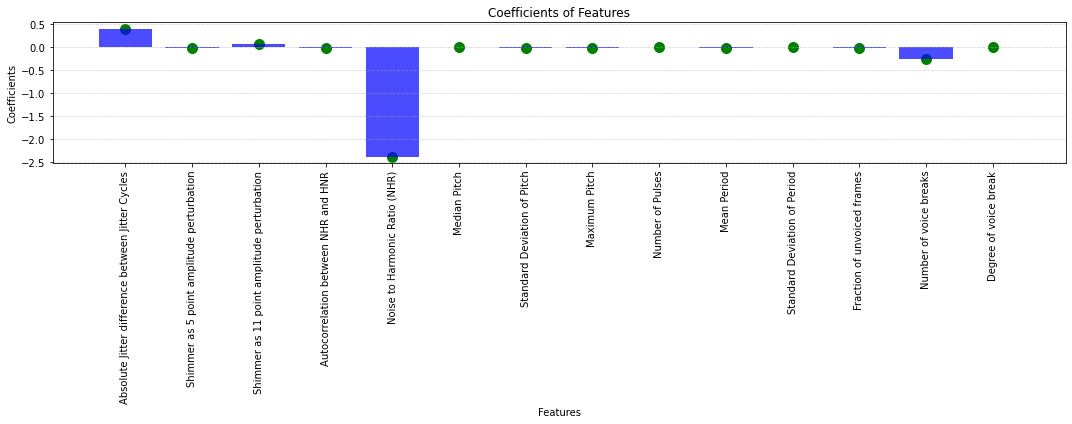

In [101]:
# Create a bar plot or scatter plot
plt.figure(figsize=(15, 6))  # Optional: Adjust the figure size

# Bar plot
plt.bar(X_train[best_features].columns, coefficients, color='b', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features')
plt.xticks(rotation=90)  # Optional: Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Optional: Add a grid

# Scatter plot (alternative)
plt.scatter(X_train[best_features].columns, coefficients, color='g', s=100)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features')

plt.tight_layout()
plt.show()

Computing the figures of merit.

[[69 35]
 [56 48]]
tn: 48, fp:35, fn:56, tp:69
Accuracy: 0.56
Sensitivity (Recall): 0.46
              precision    recall  f1-score   support

Non-diabetic       0.55      0.66      0.60       104
    Diabetic       0.58      0.46      0.51       104

    accuracy                           0.56       208
   macro avg       0.57      0.56      0.56       208
weighted avg       0.57      0.56      0.56       208

ROC AUC Score: 0.56


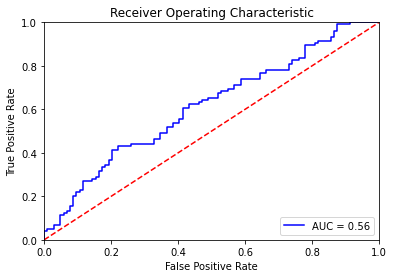

In [102]:
acc, sen, auc = fig_merit_log(y_test, y_pred, y_prob_pred)

Storing them in each of the lists.

In [103]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

#### After normalizing

We can try the model for the supposed best features after normalizing.

In [104]:
coefficients, intercept, y_pred, y_prob_pred = log_reg(X_train_norm[best_features], y_train_shuf, X_test_norm[best_features])

Computing the figures of merit.

[[67 37]
 [62 42]]
tn: 42, fp:37, fn:62, tp:67
Accuracy: 0.52
Sensitivity (Recall): 0.4
              precision    recall  f1-score   support

Non-diabetic       0.52      0.64      0.58       104
    Diabetic       0.53      0.40      0.46       104

    accuracy                           0.52       208
   macro avg       0.53      0.52      0.52       208
weighted avg       0.53      0.52      0.52       208

ROC AUC Score: 0.52


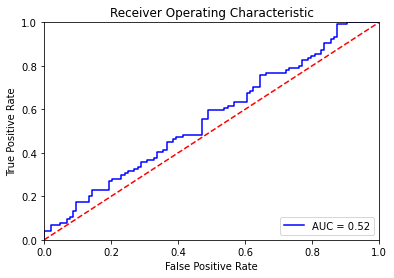

In [105]:
acc, sen, auc = fig_merit_log(y_test_shuf, y_pred, y_prob_pred)

Storing them in each of the lists.

In [106]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

### 3.3. Logistic regression with regularization for Binarty Classification

In the context of multivariable logistic regression, regularization is a technique used to prevent overfitting and improve the generalization performance of the model. It involves adding a penalty term to the standard logistic regression objective function. Three common types of regularization used in logistic regression are Lasso (L1 regularization), Ridge (L2 regularization), and ElasticNet, each with distinct characteristics:

1. **Lasso (L1 Regularization):** Minimize the sum of squared errors plus the absolute values of the coefficients multiplied by a regularization parameter (alpha) times the L1 norm. Encourages sparsity in the coefficient estimates, leading to some coefficients being exactly zero. This facilitates feature selection, effectively excluding less relevant variables.

2. **Ridge (L2 Regularization):** Minimize the sum of squared errors plus the squared values of the coefficients multiplied by a regularization parameter (alpha) times the L2 norm. Penalizes large coefficients and discourages extreme values. Ridge regularization is effective in handling multicollinearity, as it tends to distribute the impact of correlated variables more evenly.

3. **ElasticNet:** Combines both L1 and L2 regularization by adding both penalty terms to the logistic regression objective function. It addresses the limitations of Lasso and Ridge by providing a flexible regularization approach. ElasticNet is particularly useful when there are groups of correlated variables, as it tends to select one variable from each group while still allowing for sparsity.

Thus, Lasso promotes sparsity, Ridge handles multicollinearity, and ElasticNet combines characteristics of both by incorporating both L1 and L2 regularization. The choice between these regularization techniques depends on the specific characteristics of the dataset and the modeling goals. Regularization helps to control the complexity of the logistic regression model, leading to improved generalization performance and enhanced interpretability.

#### Lasso without normalizing

In [107]:
import warnings
warnings.filterwarnings('ignore')
# Define the parameter grid for grid search
param_grid = {
    'C': np.linspace(1e-4, 10, 100),  # Range of regularization strengths
}

best_params, best_score, y_pred, y_prob = log_reg(X_train[best_features], y_train, X_test[best_features], penalty='l1', param_grid=param_grid)

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

Best Parameters: {'C': 0.3031272727272727}
Best Score (Accuracy): 0.5625928865161243


Computing the figures of merit.

[[69 35]
 [37 67]]
tn: 67, fp:35, fn:37, tp:69
Accuracy: 0.65
Sensitivity (Recall): 0.64
              precision    recall  f1-score   support

Non-diabetic       0.65      0.66      0.66       104
    Diabetic       0.66      0.64      0.65       104

    accuracy                           0.65       208
   macro avg       0.65      0.65      0.65       208
weighted avg       0.65      0.65      0.65       208

ROC AUC Score: 0.65


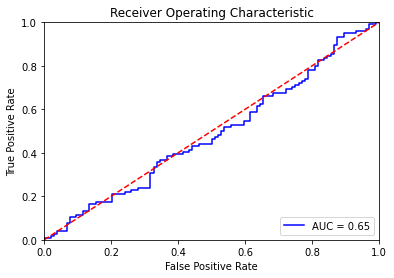

In [108]:
acc, sen, auc = fig_merit_log(y_test, y_pred, y_prob_pred)

Storing them in each of the lists.

In [109]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

#### Lasso after normalizing

In [110]:
import warnings
warnings.filterwarnings('ignore')
# Define the parameter grid for grid search
param_grid = {
    'C': np.linspace(1e-4, 10, 100),  # Range of regularization strengths
}

best_params, best_score, y_pred, y_prob = log_reg(X_train_norm[best_features], y_train_shuf, X_test_norm[best_features], penalty='l1', param_grid=param_grid)

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

Best Parameters: {'C': 0.2021181818181818}
Best Score (Accuracy): 0.6875117235408701


Computing the figures of merit.

[[74 30]
 [62 42]]
tn: 42, fp:30, fn:62, tp:74
Accuracy: 0.56
Sensitivity (Recall): 0.4
              precision    recall  f1-score   support

Non-diabetic       0.54      0.71      0.62       104
    Diabetic       0.58      0.40      0.48       104

    accuracy                           0.56       208
   macro avg       0.56      0.56      0.55       208
weighted avg       0.56      0.56      0.55       208

ROC AUC Score: 0.56


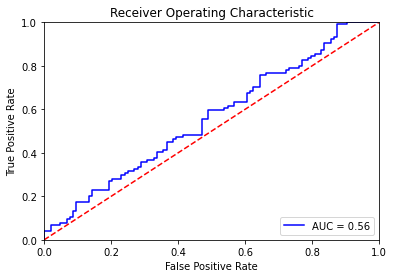

In [111]:
acc, sen, auc = fig_merit_log(y_test_shuf, y_pred, y_prob_pred)

Storing them in each of the lists.

In [112]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

#### Ridge without normalizing

In [113]:
import warnings
warnings.filterwarnings('ignore')
# Define the parameter grid for grid search
param_grid = {
    'C': np.linspace(1e-4, 10, 100),  # Range of regularization strengths
}

best_params, best_score, y_pred, y_prob = log_reg(X_train[best_features], y_train, X_test[best_features], penalty='l2', param_grid=param_grid)

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

Best Parameters: {'C': 0.5051454545454546}
Best Score (Accuracy): 0.5613952817257052


Computing the figures of merit.

[[69 35]
 [37 67]]
tn: 67, fp:35, fn:37, tp:69
Accuracy: 0.65
Sensitivity (Recall): 0.64
              precision    recall  f1-score   support

Non-diabetic       0.65      0.66      0.66       104
    Diabetic       0.66      0.64      0.65       104

    accuracy                           0.65       208
   macro avg       0.65      0.65      0.65       208
weighted avg       0.65      0.65      0.65       208

ROC AUC Score: 0.65


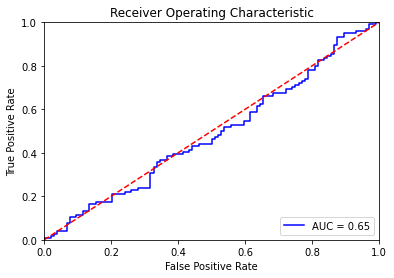

In [114]:
acc, sen, auc = fig_merit_log(y_test, y_pred, y_prob_pred)

Storing them in each of the lists.

In [115]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

#### Ridge after normalizing

In [116]:
import warnings
warnings.filterwarnings('ignore')
# Define the parameter grid for grid search
param_grid = {
    'C': np.linspace(1e-4, 10, 100),  # Range of regularization strengths
}

best_params, best_score, y_pred, y_prob = log_reg(X_train_norm[best_features], y_train_shuf, X_test_norm[best_features], penalty='l2', param_grid=param_grid)

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

Best Parameters: {'C': 0.10110909090909091}
Best Score (Accuracy): 0.6814948416420171


Computing the figures of merit.

[[69 35]
 [62 42]]
tn: 42, fp:35, fn:62, tp:69
Accuracy: 0.53
Sensitivity (Recall): 0.4
              precision    recall  f1-score   support

Non-diabetic       0.53      0.66      0.59       104
    Diabetic       0.55      0.40      0.46       104

    accuracy                           0.53       208
   macro avg       0.54      0.53      0.53       208
weighted avg       0.54      0.53      0.53       208

ROC AUC Score: 0.53


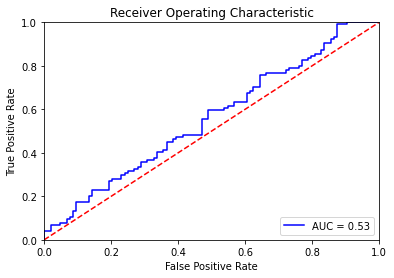

In [117]:
acc, sen, auc = fig_merit_log(y_test_shuf, y_pred, y_prob_pred)

Storing them in each of the lists.

In [118]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

#### ElasticNet without normalizing

In [119]:
import warnings
warnings.filterwarnings('ignore')
# Define the parameter grid for grid search
param_grid = {
    'C': np.linspace(1e-4, 10, 100),  # Range of regularization strengths
}

best_params, best_score, y_pred, y_prob = log_reg(X_train[best_features], y_train, X_test[best_features], penalty='elasticnet', param_grid=param_grid)

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

Best Parameters: {'C': 1.7172545454545454}
Best Score (Accuracy): 0.5613952817257052


Computing the figures of merit.

[[69 35]
 [37 67]]
tn: 67, fp:35, fn:37, tp:69
Accuracy: 0.65
Sensitivity (Recall): 0.64
              precision    recall  f1-score   support

Non-diabetic       0.65      0.66      0.66       104
    Diabetic       0.66      0.64      0.65       104

    accuracy                           0.65       208
   macro avg       0.65      0.65      0.65       208
weighted avg       0.65      0.65      0.65       208

ROC AUC Score: 0.65


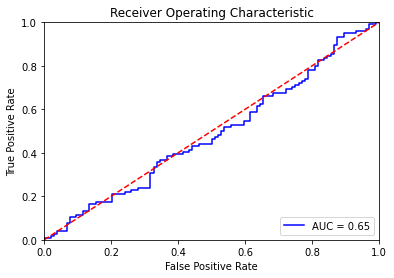

In [120]:
acc, sen, auc = fig_merit_log(y_test, y_pred, y_prob_pred)

Storing them in each of the lists.

In [121]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

#### ElasticNet without normalizing

In [122]:
import warnings
warnings.filterwarnings('ignore')
# Define the parameter grid for grid search
param_grid = {
    'C': np.linspace(1e-4, 10, 100),  # Range of regularization strengths
}

best_params, best_score, y_pred, y_prob = log_reg(X_train_norm[best_features], y_train_shuf, X_test_norm[best_features], penalty='elasticnet', param_grid=param_grid)

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

Best Parameters: {'C': 0.10110909090909091}
Best Score (Accuracy): 0.6814948416420171


Computing the figures of merit.

[[69 35]
 [62 42]]
tn: 42, fp:35, fn:62, tp:69
Accuracy: 0.53
Sensitivity (Recall): 0.4
              precision    recall  f1-score   support

Non-diabetic       0.53      0.66      0.59       104
    Diabetic       0.55      0.40      0.46       104

    accuracy                           0.53       208
   macro avg       0.54      0.53      0.53       208
weighted avg       0.54      0.53      0.53       208

ROC AUC Score: 0.53


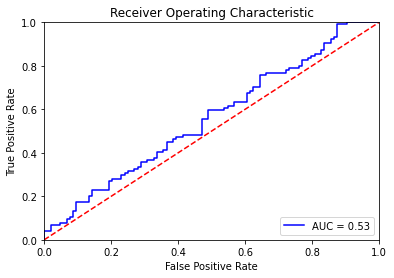

In [123]:
acc, sen, auc = fig_merit_log(y_test_shuf, y_pred, y_prob_pred)

Storing them in each of the lists.

In [124]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For auc
auc_scores.append(auc)

### 3.5. Comparison of the results obtained with the different models for parametric binary classification

In [125]:
results = pd.DataFrame()

results["Accuracy in the test set"] = accuracy_scores
results["Sensitivity in the test set"] = sensitivity_scores
results["AUC in the test set"] = auc_scores

#results
results["Models"] = ["SLR for feature 'Maximum Pitch' without normalizing",
        "SLR for feature 'Maximum Pitch' after normalizing",
        "MLR with 5 features without normalizing",
        "MLR with 5 features after normalizing",
        "MLR with 15 features without normalizing",
        "MLR with 15 features after normalizing",
        "MLR with all features without normalizing",
        "MLR with all features after normalizing",
        "MLR with all features except Patient Identifier without normalizing",
        "MLR with all features except Patient Identifier after normalizing",
        "MLR after feature selection without normalizing",
        "MLR after feature selection after normalizing",
        "MLR with regularization through LASSO without normalizing",
        "MLR with regularization through LASSO after normalizing",
        "MLR with regularization through RIDGE without normalizing",
        "MLR with regularization through RIDGE after normalizing",
        "MLR with regularization through ELASTICNET without normalizing",
        "MLR with regularization through ELASTICNET after normalizing"]

results.set_index("Models", inplace = True)

In [126]:
results

,Accuracy in the test set,Sensitivity in the test set,AUC in the test set
Models,,,
SLR for feature 'Maximum Pitch' without normalizing,0.66,0.72,0.66
SLR for feature 'Maximum Pitch' after normalizing,0.66,0.73,0.66
MLR with 5 features without normalizing,0.57,0.43,0.57
MLR with 5 features after normalizing,0.57,0.43,0.57
MLR with 15 features without normalizing,0.57,0.50,0.57
MLR with 15 features after normalizing,0.50,0.36,0.50
MLR with all features without normalizing,0.95,0.97,0.95
MLR with all features after normalizing,0.98,0.97,0.98
MLR with all features except Patient Identifier without normalizing,0.59,0.49,0.59


**Observations**:

1. **Simple Logistic Regression (SLR):**
   - It appears that SLR performs surprisingly well (with the resect the rest of the models, it still to be mediocre results) despite being trained with only one variable, 'Maximum Pitch.' This could be attributed to the fact that the relationship between 'Maximum Pitch' and the target variable is relatively straightforward and adequately captured by the logistic regression model. The simplicity of the model might contribute to its robust performance on this specific feature.
    - Also,  it has been shown that normalization will not have any effect (increase or decrease) on the estimation of the target variable, as the model is trained with a single feature, which was what was hypothesized.

2. **Multivariable Logistic Regression (MLR):**
   - The decrease in performance metrics as the number of features increases from 5 to 15 without proper feature selection may be indicative of overfitting. Without appropriate feature selection techniques, adding more features can introduce noise and irrelevant information as in the dataset we have highly correlated features, leading to a decline in model generalization by giving more strength to those groups. Thus, the performance decreased observed when using 15 features compared to 5 might be due to the inclusion of features with the same effect (as they are highly correlated) or a worst alignment with the underlying data patterns.
   - The model trained with all features, including 'Patient Identifier,' exhibits near-perfect accuracy but suffers from overfitting. 'Patient Identifier' essentially acts as a unique identifier for each data point, making the model overly complex and memorizing the training data rather than learning meaningful patterns. The overfitting is further demonstrated by the significant drop in performance when excluding 'Patient Identifier.'
   - The feature selection based on correlation and importances, as given by tree classifiers and SelectFromModel, shows mixed results. 
   
3. **Comparisson between MLR and SLR:**
   - The superiority of SLR over MLR with 5 or 15 features, or even after feature selection, may be attributed to the complexity introduced by additional features, potentially leading to overfitting and diminishing the model's ability to generalize.

4. **Regularization Techniques (LASSO, RIDGE, ELASTICNET) over the feature selected model:**
   - LASSO emerges as the most effective regularization technique, even though the differences in metrics among LASSO, RIDGE, and ELASTICNET are minimal. Regularization is known to penalize overly complex models by shrinking coefficients, which may explain the slight decrease in performance compared to the fully-featured MLR model, but still gives worst results to those obtained in SLR and MLR when using only 5 features.
   - However, regularization can help mitigate overfitting , by discouraging overly large coefficient values, but in this case, it might slightly compromise predictive performance, while reducing overfitting produced in the rest of models.
   - The feature selection based on correlation and importances, as given by tree classifiers and SelectFromModel, shows mixed results, with the estimations not demonstrating an improvement in performance and, in fact, being slightly worse. This phenomenon may arise from the inherent trade-off in feature selection — while the goal is to retain only the most informative variables Then, the following can happen. We are excluding certain features, leading to the loss of relevant information, resulting in a decrease in the model's overall predictive capability, or we are eliminating the overfitting produced by the highly correlated features presented in our dataset. What we want is the latter, and thus the striking the right balance in feature selection is crucial to prevent the inadvertent removal of vital information and to ensure the selected features contribute positively to the model's accuracy and generalization.

5. **Effect of Normalization:**
   - Although normalization tends to worsen the performance metrics, it is crucial for ensuring that variables are on a consistent scale. Normalization prevents the model from giving undue importance to variables with larger values, reducing the risk of overfitting and ensuring a fair comparison between different features.

Therefore, the choice of the best model depends on the specific goals of the project. While SLR performs better, MLR with appropriate feature selection and regularization, particularly LASSO, can provide a good balance between complexity and predictive performance. The trade-off between model complexity and generalization is crucial in achieving robust and reliable results. However, The obtained results, characterized by their mediocrity, underscore the impracticality of utilizing these findings for clinical or medical diagnostic purposes due to the limitations and inadequacies of the employed logistic regression models.

Hence, the mediocre results observed in the logistic regression models can be attributed to the inherent complexity of the dataset. Logistic regression, while interpretable and straightforward, may struggle to capture intricate relationships present in highly complex data. As the next step in the project, it is imperative to explore more advanced machine learning algorithms such as K-Nearest Neighbors (KNN), Extreme Gradient Boosting (XGB), Support Vector Classification (SVC), and even delve into the realm of deep learning with neural networks. These methods are better equipped to handle intricate patterns, non-linear relationships, and high-dimensional data, potentially yielding more accurate predictions for the given dataset. Striking the right balance between model complexity and interpretability remains crucial in advancing the project and extracting meaningful insights from the intricacies of the data.

## 4. Parametric Multiclass Classification

Now for the target variable **'UPDRS'**, which are different ranges for marks regarding Parkinson Disease, we follow the same procedura as before, but with less steps or models, as most of them were explained in the previous section.

Before starting with this section we define some figures of merit to evaluate the model:

In [127]:
accuracy_scores = []
sensitivity_scores = []
auc_scores = []
avg_auc = []

### 4.1. Dataset import

First of all, we import the clean dataset we obtained in Project 1, which was already split in train and test, but without normalizing it. In this case we are going to use the one for multiclass classification, with the target variable 'UPDRS'.

In [128]:
train = pd.read_csv('train_data_mcl.csv')
test = pd.read_csv('test_data_mcl.csv')

Now divide each of the sets in features and target variable.

In [129]:
X_train, y_train = (train.drop('UPDRS', axis=1), train['UPDRS'])
X_test, y_test = (test.drop('UPDRS', axis=1), test['UPDRS'])

Finally, we can show each of the sets.

In [130]:
X_train.head(5)

,Patient Identifier,Jitter in %,Absolute Jitter in microseconds,Jitter as relative amplitude perturbation,Jitter as 5-point period perturbation,Absolute Jitter difference between Jitter Cycles,Shimmer in %,Absolute Shimmer in decibels (dB),Shimmer as 3 point amplitude perturbation,Shimmer as 5 point amplitude perturbation,...,Standard Deviation of Pitch,Minimum Pitch,Maximum Pitch,Number of Pulses,Number of Periods,Mean Period,Standard Deviation of Period,Fraction of unvoiced frames,Number of voice breaks,Degree of voice break
0,1.0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,10.421,142.229,187.576,160.0,159.000000,0.006065,0.000416,0.000,0.0,0.000
1,1.0,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,14.773,159.515,234.505,170.0,169.000000,0.005181,0.000403,2.247,0.0,0.000
2,1.0,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,12.981,146.445,211.442,171.5,169.384615,0.006071,0.000474,10.656,1.0,0.178
3,1.0,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,10.853,182.713,220.230,94.0,92.000000,0.004910,0.000320,0.000,0.0,0.000
4,1.0,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,11.499,182.821,225.162,117.0,114.000000,0.004757,0.000380,18.182,1.0,13.318


In [131]:
X_test.head(5)

,Patient Identifier,Jitter in %,Absolute Jitter in microseconds,Jitter as relative amplitude perturbation,Jitter as 5-point period perturbation,Absolute Jitter difference between Jitter Cycles,Shimmer in %,Absolute Shimmer in decibels (dB),Shimmer as 3 point amplitude perturbation,Shimmer as 5 point amplitude perturbation,...,Standard Deviation of Pitch,Minimum Pitch,Maximum Pitch,Number of Pulses,Number of Periods,Mean Period,Standard Deviation of Period,Fraction of unvoiced frames,Number of voice breaks,Degree of voice break
0,9.0,0.449,0.000035,0.165,0.198,0.495,3.616,0.320,1.401,2.298,...,4.106,120.885,142.468,197.0,196.0,0.007758,0.000272,0.000,0.0,0.0
1,9.0,0.258,0.000018,0.092,0.139,0.276,2.603,0.248,0.915,1.323,...,3.172,130.799,146.203,245.0,244.0,0.007116,0.000163,0.000,0.0,0.0
2,9.0,0.296,0.000020,0.098,0.133,0.293,3.022,0.288,1.164,1.529,...,3.309,137.541,155.351,146.0,145.0,0.006867,0.000184,0.000,0.0,0.0
3,9.0,2.425,0.000215,1.178,1.214,3.534,11.826,1.113,4.656,6.290,...,3.121,108.195,124.664,37.0,36.0,0.008880,0.000463,3.226,0.0,0.0
4,9.0,0.690,0.000063,0.257,0.357,0.772,6.354,0.618,2.721,3.993,...,2.238,105.873,118.081,42.0,41.0,0.009111,0.000198,0.000,0.0,0.0


In [132]:
y_train.head(5)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: UPDRS, dtype: float64

In [133]:
y_test.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: UPDRS, dtype: float64

In order to perform what is asked we create a personalized function, that will also help us for the rest of the section.

In [134]:
def log_reg(X_train, y_train, X_test, feature=None, penalty=None):
    """
    Perform logistic regression with optional L1, L2, or no regularization.

    Parameters:
    - X_train (array-like): Training feature dataset.
    - y_train (array-like): Training target variable.
    - X_test (array-like): Testing feature dataset.
    - feature (str): If specified, train and predict using only the selected feature.
    - penalty (str): If specified, apply regularization with options 'l1' for L1 penalty, 'l2' for L2 penalty, or None for no regularization.

    Returns:
    Depending on the provided parameters:
    - If feature is None and penalty is None: Tuple containing the coefficients, intercept, predicted labels, and predicted probabilities.
    - If feature is specified: Tuple containing the coefficient, intercept, predicted labels, predicted probabilities, and the trained model.
    - If penalty is 'l2' or 'l1': Tuple containing the predicted labels, predicted probabilities, and the trained model with the specified regularization.
    """

    if feature is None:
        if penalty is None:
            # Logistic regression without regularization
            model = LogisticRegression()
            model = model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_prob_pred = model.predict_proba(X_test)
            intercept = model.intercept_
            coefficients = model.coef_

            return coefficients[0], intercept[0], y_pred, y_prob_pred

        if penalty == 'l2':  # Ridge regularization
            ridge_regressor = LogisticRegression(penalty=penalty, solver='lbfgs', max_iter=1000)
            model = OneVsRestClassifier(ridge_regressor)
            model = model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_prob_pred = model.predict_proba(X_test)

            return y_pred, y_prob_pred, model

        if penalty == 'l1':  # Lasso regularization
            lasso_regressor = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
            model = OneVsRestClassifier(lasso_regressor)
            model = model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_prob_pred = model.predict_proba(X_test)

            return y_pred, y_prob_pred, model

        else:
            # Logistic regression with default OneVsRestClassifier
            model = OneVsRestClassifier(LogisticRegression())
            model = model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_prob_pred = model.predict_proba(X_test)

            return y_pred, y_prob_pred, model

    else:
        # Logistic regression with feature selection
        model = LogisticRegression()
        model = model.fit(np.array(X_train[feature]).reshape(-1, 1), y_train)
        intercept = model.intercept_
        coefficients = model.coef_
        y_pred = model.predict(np.array(X_test[feature]).reshape(-1, 1))
        y_prob_pred = model.predict_proba(np.array(X_test[feature]).reshape(-1, 1))

        return coefficients[0][0], intercept[0], y_pred, y_prob_pred, model

And also for the figures of merit.

In [135]:
def figs_merit(y_test, y_pred, y_prob_pred, model):
    """
    Compute and print various metrics for evaluating classification performance.

    Parameters:
    - y_test (array-like): True labels of the test set.
    - y_pred (array-like): Predicted labels of the test set.
    - y_prob_pred (array-like): Predicted probabilities for each class in the test set.
    - model (object): Trained classification model.

    Returns:
    Tuple containing accuracy, sensitivity, AUC scores for each class, and average AUC score.
    """

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Compute the accuracy
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    print("Accuracy:", accuracy)

    # Compute sensitivity (recall)
    sensitivity = round(recall_score(y_test, y_pred, average='macro'), 2)
    print("Sensitivity (Recall):", sensitivity)

    # Generate the classification report
    report = classification_report(y_test, y_pred, target_names=['0-13', '14-27', '28-41', '41-55'])
    print(report)

    # ROC and AUC
    n_classes = len(model.classes_)
    auc_scores = []
    for i in range(n_classes):
        # Create binary labels for the current class
        y_true_binary = (np.array(y_test) == i).astype(int)

        # Compute ROC AUC score for the current class
        roc_auc = round(roc_auc_score(y_true_binary, y_prob_pred[:, i]), 2)
        auc_scores.append(roc_auc)
        print(f"ROC AUC Score for Class {i}: {roc_auc}")

        # Compute the ROC curve for the current class
        fpr, tpr, thresholds = roc_curve(y_true_binary, y_prob_pred[:, i])

        # Plot the ROC curve
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

    # You can use auc_scores as needed, e.g., averaging them for an overall score
    average_auc = np.mean(auc_scores)
    print(f"Average ROC AUC Score: {round(average_auc, 2)}")

    return accuracy, sensitivity, auc_scores, average_auc

Now we can analyze the most relevant features regarding the estimation of the target variable, 'Status'. In order to so, we make simple linear regression wut every feature, and then graph the coeficients in a bar plot.

In [136]:
columns = X_train.columns

coefficients = []
intercepts = []

for feature in columns:
    lr = log_reg(X_train, y_train, X_test, feature=feature)
    coefficients.append(lr[0])
    intercepts.append(lr[1])

Plotting the coefficients.

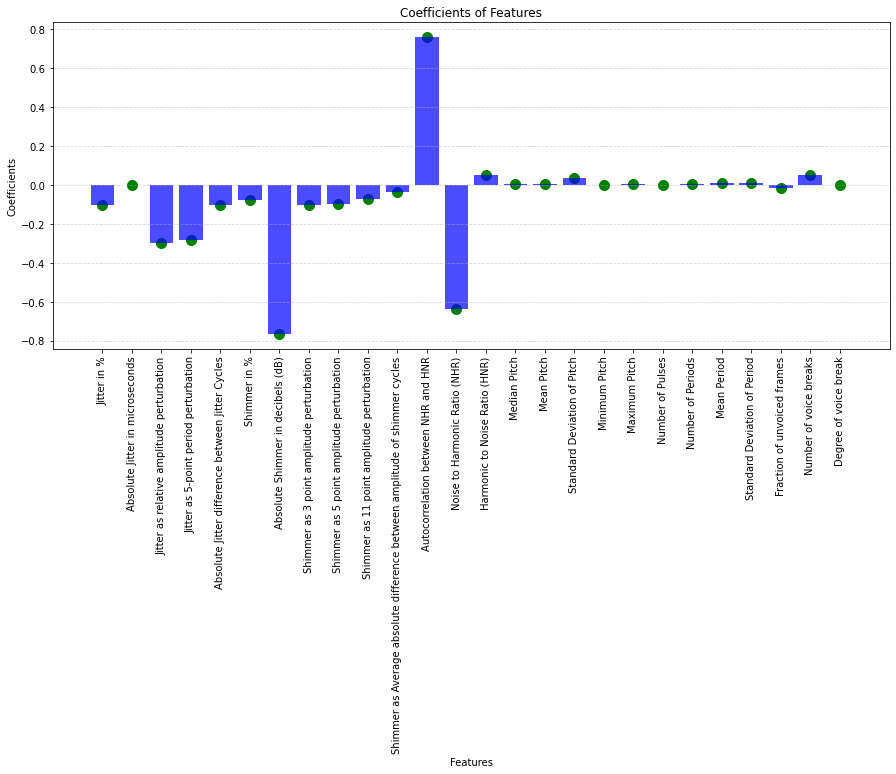

In [137]:
# Create a bar plot or scatter plot
plt.figure(figsize=(15, 6))  # Optional: Adjust the figure size

# Bar plot
plt.bar(columns[1:], coefficients[1:], color='b', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features')
plt.xticks(rotation=90)  # Optional: Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Optional: Add a grid

# Scatter plot (alternative)
plt.scatter(columns[1:], coefficients[1:], color='g', s=100)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features')

plt.tight_layout()
plt.show()

**Observations**: As said before, as we have groups of high correlated features, the one that allows better estimation of the target variable cannot be chosed following this procedure. 

Thus, in the following sections, two different (compatible) methods are going to be followed in order to perform feature selection:
- Tree classifier and Select from model in order to compute the importance of each feature.
- Correlation coefficients.

**Normalizing and Shuffling the dataset**

We also normalize and shuffle the dataset in order to compare the results between giving as input a non-normalized dataset or feature and a normalized one.

In [138]:
# Normalizing both datasets
X_train_norm, y_train_shuf, X_test_norm, y_test_shuf = normalizing("rs", X_train, X_test, y_train, y_test)

# For train set
X_train_norm = pd.DataFrame(X_train_norm)
X_train_norm.columns = columns

# For test set
X_test_norm = pd.DataFrame(X_test_norm)
X_test_norm.columns = columns

### 4.2. Simple Logistic Regression for Multiclass Classification

In this case we follow the same procedure as for binary classification.

#### Feature Selection I: Tree classifier for feature importances.

In [139]:
# For dataset without normalization
# For train
patient_id_train = X_train['Patient Identifier']
patient_id_train.columns = 'Patient Identifier'
X_train = X_train.drop('Patient Identifier', axis=1)
# For test
patient_id_test = X_test['Patient Identifier']
patient_id_test.columns = 'Patient Identifier'
X_test = X_test.drop('Patient Identifier', axis=1)

In [140]:
# For dataset after normalization
# For train
patient_id_train_norm = X_train_norm['Patient Identifier']
patient_id_train_norm.columns = 'Patient Identifier'
X_train_norm = X_train_norm.drop('Patient Identifier', axis=1)
# For test
patient_id_test_norm = X_test_norm['Patient Identifier']
patient_id_test_norm.columns = 'Patient Identifier'
X_test_norm = X_test_norm.drop('Patient Identifier', axis=1)

Now compute the importance of each feature.

In [141]:
# Create and fit the classifier
clf = ExtraTreesClassifier(n_estimators=50, random_state=10)
clf = clf.fit(X_train, y_train)

# Create and fit SelectFromModel with feature names
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)

# Get feature importances for all features
importances = dict(zip(X_train.columns, clf.feature_importances_))

And we show the results.

In [142]:
# Find the maximum width of the keys for formatting
max_key_width = max(map(len, importances.keys()))

for key, value in importances.items():
    print(f"{key.ljust(max_key_width)}  {value}")

Jitter in %                                                                 0.025354111890796477
Absolute Jitter in microseconds                                             0.027578663713191603
Jitter as relative amplitude perturbation                                   0.032004328246447236
Jitter as 5-point period perturbation                                       0.02923839280424116
Absolute Jitter difference between Jitter Cycles                            0.030380198382981956
Shimmer in %                                                                0.034070457329780486
Absolute Shimmer in decibels (dB)                                           0.03230800284847804
Shimmer as 3 point amplitude perturbation                                   0.03687390099877869
Shimmer as 5 point amplitude perturbation                                   0.036469167161405455
Shimmer as 11 point amplitude perturbation                                  0.032390910463778504
Shimmer as Average absolute diffe

Recalling the function to choose the most important features.

In [143]:
feature = top_features(importances, 1)
print(feature)

['Median Pitch']


#### Simple Logistic Regression without normalization

Following with the Logistic Regression, we call the previous function defined, choosing the variable "Maximum Pitch" as it is the one that best estimates the model.

In [144]:
coefficients, intercept, y_pred, y_prob_pred, model = log_reg(X_train, y_train, X_test, feature=feature[0])

We compute some figures of merit to evaluate and compare it with the following models

[[ 2  0  0 24]
 [23  2  0  1]
 [ 2  0  0 24]
 [ 0  1 25  0]]
Accuracy: 0.04
Sensitivity (Recall): 0.04
              precision    recall  f1-score   support

        0-13       0.07      0.08      0.08        26
       14-27       0.67      0.08      0.14        26
       28-41       0.00      0.00      0.00        26
       41-55       0.00      0.00      0.00        26

    accuracy                           0.04       104
   macro avg       0.19      0.04      0.05       104
weighted avg       0.19      0.04      0.05       104

ROC AUC Score for Class 0: 0.07


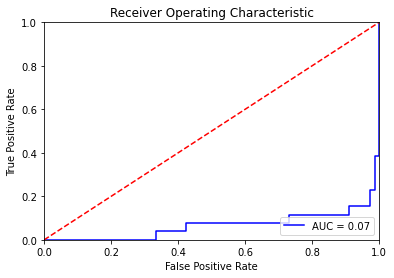

ROC AUC Score for Class 1: 0.66


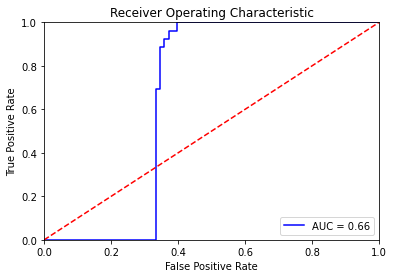

ROC AUC Score for Class 2: 0.3


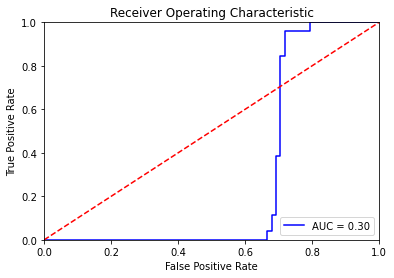

ROC AUC Score for Class 3: 0.0


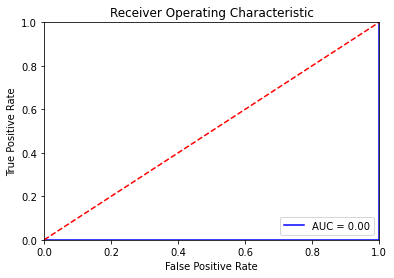

Average ROC AUC Score: 0.26


In [145]:
acc, sen, aucs, av_auc = figs_merit(y_test, y_pred, y_prob_pred, model)

In [146]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For aucs
auc_scores.append(aucs)
# For average auc
avg_auc.append(av_auc)

#### Simple Logistic Regression with normalization

With the normalized dataset, we compute simple logistic regression, with the same feature as before.

In [147]:
coefficients, intercept, y_pred, y_prob_pred, model = log_reg(X_train_norm, y_train_shuf, X_test_norm, feature=feature[0])

We compute some figures of merit to evaluate and compare it with the following models

[[ 2  0  0 24]
 [23  2  0  1]
 [ 2  0  0 24]
 [ 0  1 25  0]]
Accuracy: 0.04
Sensitivity (Recall): 0.04
              precision    recall  f1-score   support

        0-13       0.07      0.08      0.08        26
       14-27       0.67      0.08      0.14        26
       28-41       0.00      0.00      0.00        26
       41-55       0.00      0.00      0.00        26

    accuracy                           0.04       104
   macro avg       0.19      0.04      0.05       104
weighted avg       0.19      0.04      0.05       104

ROC AUC Score for Class 0: 0.06


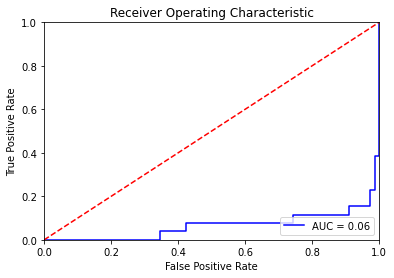

ROC AUC Score for Class 1: 0.66


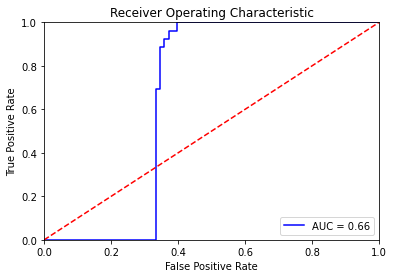

ROC AUC Score for Class 2: 0.3


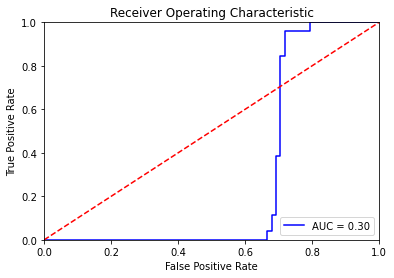

ROC AUC Score for Class 3: 0.0


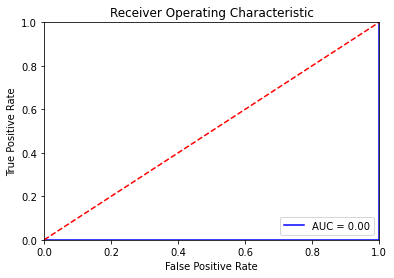

Average ROC AUC Score: 0.26


In [148]:
acc, sen, aucs, av_auc = figs_merit(y_test_shuf, y_pred, y_prob_pred, model)

In [149]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For aucs
auc_scores.append(aucs)
# For average auc
avg_auc.append(av_auc)

### 4.3. Multivariable Logistic Regression for Multiclass Classification

In this case we make less steps as before, performing it only with 10 variables and after applying feature selection.

#### Multivariable LR with 10 features without normalizing

First we take the 5 variables which best estimates the target variable.

In [150]:
# Computing the 5 features which best estimates the target variable.
features = top_features(importances, 10)
# Showing the features
for feature in features:
    print(feature)

Median Pitch
Mean Pitch
Minimum Pitch
Mean Period
Maximum Pitch
Standard Deviation of Pitch
Standard Deviation of Period
Shimmer as 3 point amplitude perturbation
Fraction of unvoiced frames
Shimmer as 5 point amplitude perturbation


To compute Logistic Regression we call our function.

In [151]:
coefficients, intercept, y_pred, y_prob_pred = log_reg(X_train[features], y_train, X_test[features])

We compute some figures of merit to evaluate and compare it with the following models.

[[ 2  3  6 15]
 [12  6  6  2]
 [ 6  2  2 16]
 [ 5  5 11  5]]
Accuracy: 0.14
Sensitivity (Recall): 0.14
              precision    recall  f1-score   support

        0-13       0.08      0.08      0.08        26
       14-27       0.38      0.23      0.29        26
       28-41       0.08      0.08      0.08        26
       41-55       0.13      0.19      0.16        26

    accuracy                           0.14       104
   macro avg       0.17      0.14      0.15       104
weighted avg       0.17      0.14      0.15       104

ROC AUC Score for Class 0: 0.42


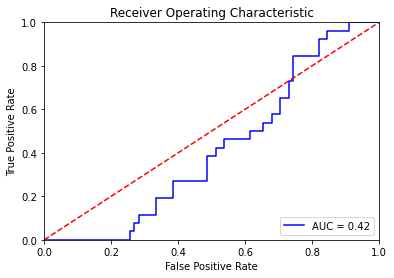

ROC AUC Score for Class 1: 0.62


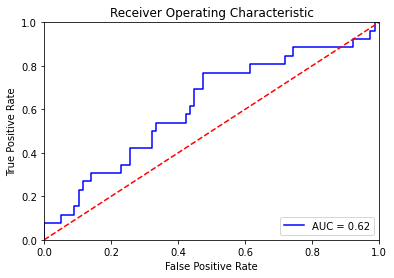

ROC AUC Score for Class 2: 0.26


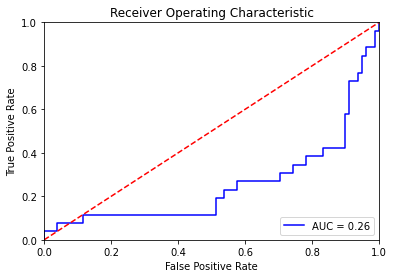

ROC AUC Score for Class 3: 0.4


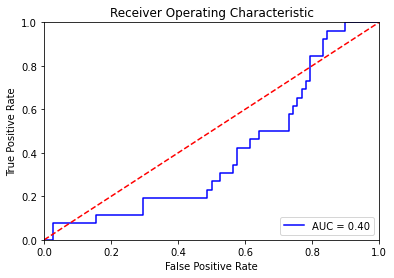

Average ROC AUC Score: 0.43


In [152]:
acc, sen, aucs, av_auc  = figs_merit(y_test,y_pred,y_prob_pred, model)

In [153]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For aucs
auc_scores.append(aucs)
# For average auc
avg_auc.append(av_auc)

#### Multivariable LR with 10 features after normalizing

Now normalizing we compute Logistic Regression.

In [154]:
coefficients, intercept, y_pred, y_prob_pred = log_reg(X_train_norm[features], y_train_shuf, X_test_norm[features])

We compute some figures of merit to evaluate and compare it with the following models

[[ 5  1  0 20]
 [12  7  4  3]
 [ 1  0  4 21]
 [ 4  2 20  0]]
Accuracy: 0.15
Sensitivity (Recall): 0.15
              precision    recall  f1-score   support

        0-13       0.23      0.19      0.21        26
       14-27       0.70      0.27      0.39        26
       28-41       0.14      0.15      0.15        26
       41-55       0.00      0.00      0.00        26

    accuracy                           0.15       104
   macro avg       0.27      0.15      0.19       104
weighted avg       0.27      0.15      0.19       104

ROC AUC Score for Class 0: 0.6


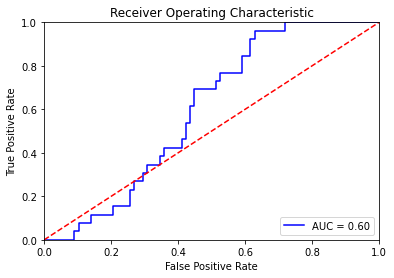

ROC AUC Score for Class 1: 0.61


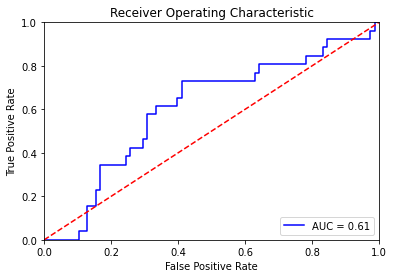

ROC AUC Score for Class 2: 0.44


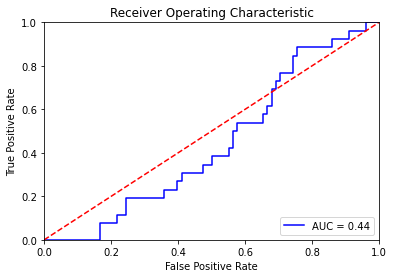

ROC AUC Score for Class 3: 0.14


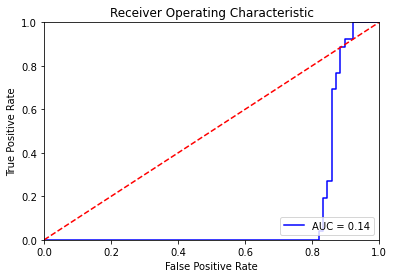

Average ROC AUC Score: 0.45


In [155]:
acc, sen, aucs, av_auc  = figs_merit(y_test_shuf,y_pred,y_prob_pred, model)

In [156]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For aucs
auc_scores.append(aucs)
# For average auc
avg_auc.append(av_auc)

#### Multivariable LR after Feature Selection II: Correlation between features and their importance regarding the estimation of the target variable.

Finally, we make Multivariable LR after applying feature selection (next step of the previous one) taking into account the correlation between features which was stand out in Project 1. We know that there are groups of features which are highly correlated among them. 

The correlation matrix has already been shown, so we compute different groups of features which have high correletion between them.

In [157]:
# Creamos una lista con las columnas/características
columns = list(X_train.columns)

# Creamos un diccionario para almacenar los grupos de columnas altamente correlacionadas
correlation_groups = {}

# Iteramos sobre las columnas de la lista creada previamente
for column in columns:
    
    # Flag para indicar si la columna está asignada a un grupo existente
    assigned_to_group = False
    
    # Iteramos sobre los grupos existentes
    for group, group_columns in correlation_groups.items():
        
        # Calculamos la correlación promedio entre la columna actual y las columnas del grupo
        avg_correlation = sum(X_train[column].corr(X_train[col]) for col in group_columns) / len(group_columns)
        
        # Si la correlación promedio es mayor que un umbral, asignamos la columna al grupo
        if avg_correlation > 0.8:
            correlation_groups[group].append(column)
            assigned_to_group = True
            break
    
    # Si la columna no se asigna a un grupo existente, creamos un nuevo grupo
    if not assigned_to_group:
        correlation_groups[column] = [column]
        
# Showing the resulting groups
for i, (group, group_columns) in enumerate(correlation_groups.items()):
    print(f"\n{i+1} Group {group}: {group_columns}")


1 Group Jitter in %: ['Jitter in %', 'Absolute Jitter in microseconds', 'Jitter as relative amplitude perturbation', 'Jitter as 5-point period perturbation', 'Absolute Jitter difference between Jitter Cycles']

2 Group Shimmer in %: ['Shimmer in %', 'Absolute Shimmer in decibels (dB)', 'Shimmer as 5 point amplitude perturbation', 'Shimmer as Average absolute difference between amplitude of shimmer cycles']

3 Group Shimmer as 3 point amplitude perturbation: ['Shimmer as 3 point amplitude perturbation']

4 Group Shimmer as 11 point amplitude perturbation: ['Shimmer as 11 point amplitude perturbation']

5 Group Autocorrelation between NHR and HNR: ['Autocorrelation between NHR and HNR', 'Harmonic to Noise Ratio (HNR)']

6 Group Noise to Harmonic Ratio (NHR): ['Noise to Harmonic Ratio (NHR)']

7 Group Median Pitch: ['Median Pitch', 'Mean Pitch', 'Minimum Pitch', 'Maximum Pitch']

8 Group Standard Deviation of Pitch: ['Standard Deviation of Pitch']

9 Group Number of Pulses: ['Number of P

Now we can compute the importance of each feature in order to select one per correlation group.

In [158]:
# Create a list to add the best features
best_features = []

# Iterating over the correlation_groups as a dictionary of groups of correlated features
# (the created in the previous example)
for group, group_columns in correlation_groups.items():
    # Find the feature with the highest importance in the current group
    best_features.append(max(group_columns, key=lambda x: importances[x]))
    
# Show the features selected
for i, feature in enumerate(best_features):
    print(f"Best feature for group {i+1}: {feature}")

Best feature for group 1: Jitter as relative amplitude perturbation
Best feature for group 2: Shimmer as 5 point amplitude perturbation
Best feature for group 3: Shimmer as 3 point amplitude perturbation
Best feature for group 4: Shimmer as 11 point amplitude perturbation
Best feature for group 5: Harmonic to Noise Ratio (HNR)
Best feature for group 6: Noise to Harmonic Ratio (NHR)
Best feature for group 7: Median Pitch
Best feature for group 8: Standard Deviation of Pitch
Best feature for group 9: Number of Periods
Best feature for group 10: Mean Period
Best feature for group 11: Standard Deviation of Period
Best feature for group 12: Fraction of unvoiced frames
Best feature for group 13: Number of voice breaks
Best feature for group 14: Degree of voice break


#### Without normalizing

Finally, we can try the model for the supposed best features.

In [159]:
coefficients, intercept, y_pred, y_prob_pred = log_reg(X_train[best_features], y_train, X_test[best_features])

And we can also show the previously seen plot for the coefficients, but in this case for those features that best estimate the target variable.

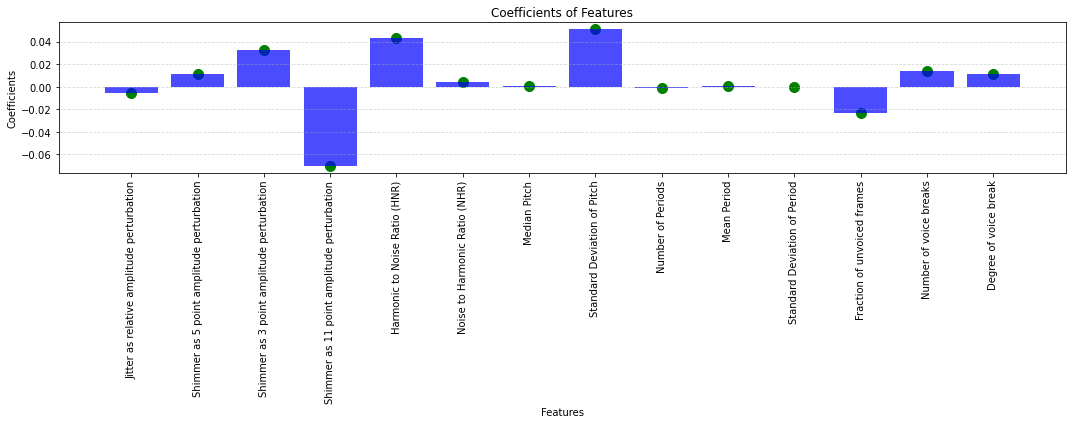

In [160]:
# Create a bar plot or scatter plot
plt.figure(figsize=(15, 6))  # Optional: Adjust the figure size

# Bar plot
plt.bar(X_train[best_features].columns, coefficients, color='b', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features')
plt.xticks(rotation=90)  # Optional: Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Optional: Add a grid

# Scatter plot (alternative)
plt.scatter(X_train[best_features].columns, coefficients, color='g', s=100)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features')

plt.tight_layout()
plt.show()

We compute some figures of merit to evaluate and compare it with the following models.

[[ 2  2  0 22]
 [16  5  2  3]
 [ 7  1  4 14]
 [ 6  3 17  0]]
Accuracy: 0.11
Sensitivity (Recall): 0.11
              precision    recall  f1-score   support

        0-13       0.06      0.08      0.07        26
       14-27       0.45      0.19      0.27        26
       28-41       0.17      0.15      0.16        26
       41-55       0.00      0.00      0.00        26

    accuracy                           0.11       104
   macro avg       0.17      0.11      0.13       104
weighted avg       0.17      0.11      0.13       104

ROC AUC Score for Class 0: 0.46


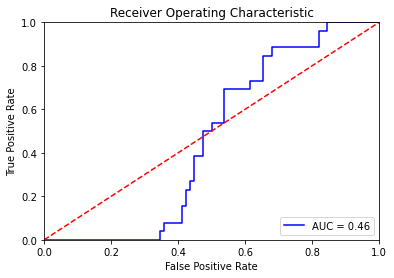

ROC AUC Score for Class 1: 0.47


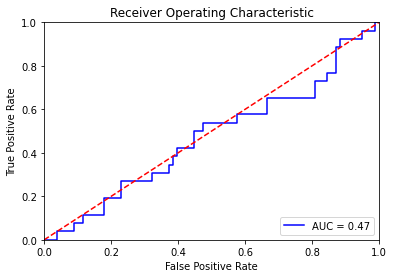

ROC AUC Score for Class 2: 0.42


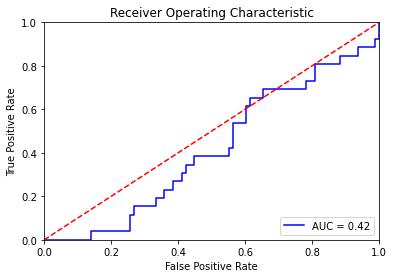

ROC AUC Score for Class 3: 0.18


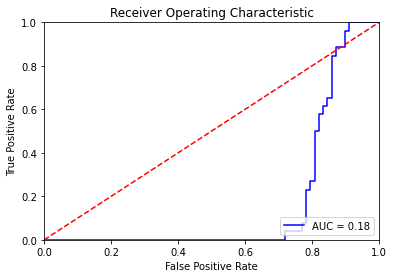

Average ROC AUC Score: 0.38


In [161]:
acc, sen, aucs, av_auc  = figs_merit(y_test,y_pred,y_prob_pred, model)

In [162]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For aucs
auc_scores.append(aucs)
# For average auc
avg_auc.append(av_auc)

#### After normalizing

We can try the model for the supposed best features after normalizing.

In [163]:
coefficients, intercept, y_pred, y_prob_pred = log_reg(X_train_norm[best_features], y_train_shuf, X_test_norm[best_features])

We compute some figures of merit to evaluate and compare it with the following models.

[[ 4  1  0 21]
 [16  5  2  3]
 [ 4  0  8 14]
 [ 6  6 14  0]]
Accuracy: 0.16
Sensitivity (Recall): 0.16
              precision    recall  f1-score   support

        0-13       0.13      0.15      0.14        26
       14-27       0.42      0.19      0.26        26
       28-41       0.33      0.31      0.32        26
       41-55       0.00      0.00      0.00        26

    accuracy                           0.16       104
   macro avg       0.22      0.16      0.18       104
weighted avg       0.22      0.16      0.18       104

ROC AUC Score for Class 0: 0.57


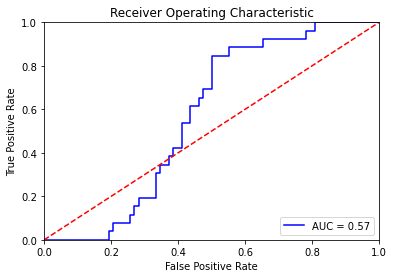

ROC AUC Score for Class 1: 0.59


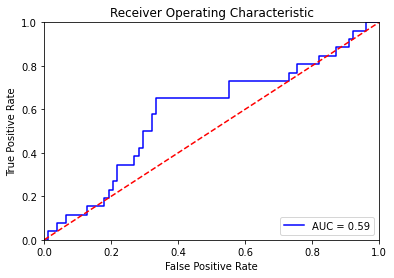

ROC AUC Score for Class 2: 0.56


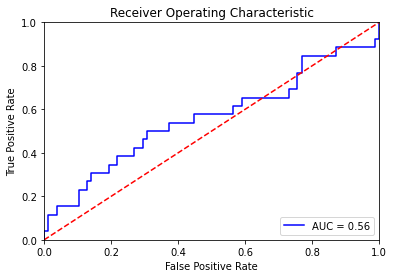

ROC AUC Score for Class 3: 0.13


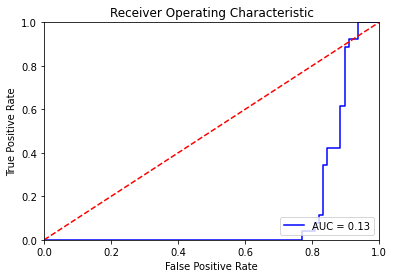

Average ROC AUC Score: 0.46


In [164]:
acc, sen, aucs, av_auc  = figs_merit(y_test_shuf, y_pred, y_prob_pred, model)

In [165]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For aucs
auc_scores.append(aucs)
# For average auc
avg_auc.append(av_auc)

### 4.4. Logistic regression with regularization for Multiclass Classification

In this last section we perform it only for the normalized dataset, after the application of feature selection.

#### Lasso

We can try the model for the supposed best features after normalizing, applying Lasso regularization.

In [166]:
y_pred, y_prob_pred, model = log_reg(X_train_norm[best_features], y_train_shuf, X_test_norm[best_features], penalty='l1')

Some figures of merit.

[[ 3  0  0 23]
 [16  5  2  3]
 [ 4  0  8 14]
 [ 5  6 15  0]]
Accuracy: 0.15
Sensitivity (Recall): 0.15
              precision    recall  f1-score   support

        0-13       0.11      0.12      0.11        26
       14-27       0.45      0.19      0.27        26
       28-41       0.32      0.31      0.31        26
       41-55       0.00      0.00      0.00        26

    accuracy                           0.15       104
   macro avg       0.22      0.15      0.17       104
weighted avg       0.22      0.15      0.17       104

ROC AUC Score for Class 0: 0.56


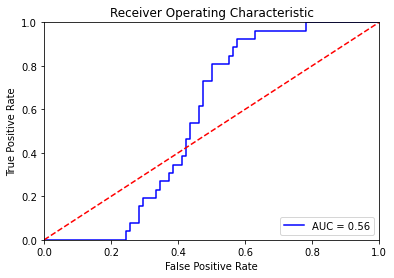

ROC AUC Score for Class 1: 0.58


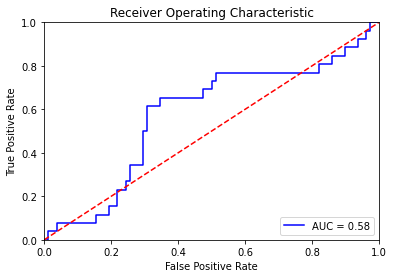

ROC AUC Score for Class 2: 0.6


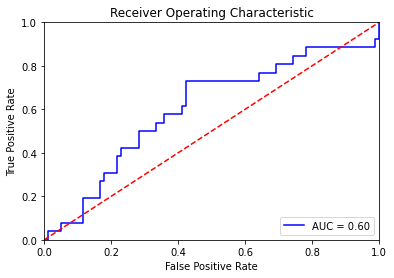

ROC AUC Score for Class 3: 0.13


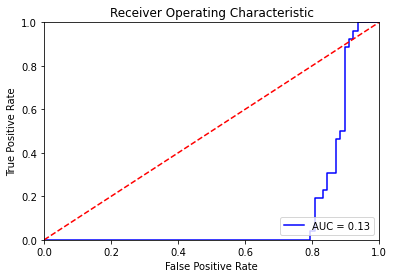

Average ROC AUC Score: 0.47


In [167]:
acc, sen, aucs, av_auc  = figs_merit(y_test_shuf, y_pred, y_prob_pred, model)

In [168]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For aucs
auc_scores.append(aucs)
# For average auc
avg_auc.append(av_auc)

#### Ridge

We can try the model for the supposed best features after normalizing, applying Lasso regularization.

In [169]:
y_pred, y_prob_pred, model = log_reg(X_train_norm[best_features], y_train_shuf, X_test_norm[best_features], penalty='l2')

Some figures of merit.

[[ 3  1  0 22]
 [16  5  2  3]
 [ 4  0  8 14]
 [ 6  5 15  0]]
Accuracy: 0.15
Sensitivity (Recall): 0.15
              precision    recall  f1-score   support

        0-13       0.10      0.12      0.11        26
       14-27       0.45      0.19      0.27        26
       28-41       0.32      0.31      0.31        26
       41-55       0.00      0.00      0.00        26

    accuracy                           0.15       104
   macro avg       0.22      0.15      0.17       104
weighted avg       0.22      0.15      0.17       104

ROC AUC Score for Class 0: 0.56


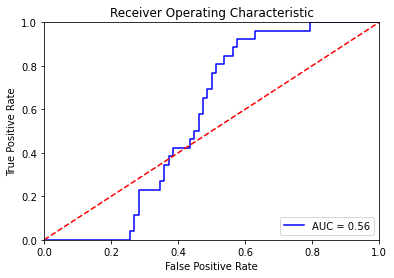

ROC AUC Score for Class 1: 0.57


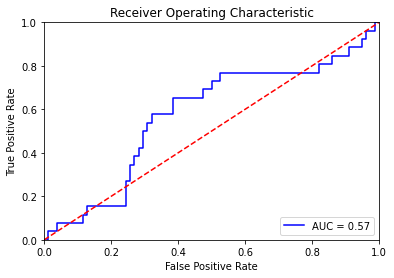

ROC AUC Score for Class 2: 0.61


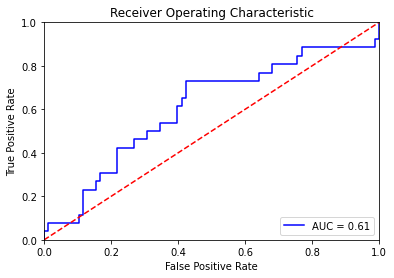

ROC AUC Score for Class 3: 0.14


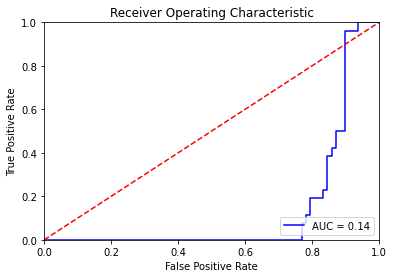

Average ROC AUC Score: 0.47


In [170]:
acc, sen, aucs, av_auc  = figs_merit(y_test_shuf, y_pred, y_prob_pred, model)

In [171]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For aucs
auc_scores.append(aucs)
# For average auc
avg_auc.append(av_auc)

#### Ridge

We can try the model for the supposed best features after normalizing, applying Lasso regularization.

In [172]:
y_pred, y_prob_pred, model = log_reg(X_train_norm[best_features], y_train_shuf, X_test_norm[best_features], penalty='elasticnet')

Some figures of merit.

[[ 3  1  0 22]
 [16  5  2  3]
 [ 4  0  8 14]
 [ 6  5 15  0]]
Accuracy: 0.15
Sensitivity (Recall): 0.15
              precision    recall  f1-score   support

        0-13       0.10      0.12      0.11        26
       14-27       0.45      0.19      0.27        26
       28-41       0.32      0.31      0.31        26
       41-55       0.00      0.00      0.00        26

    accuracy                           0.15       104
   macro avg       0.22      0.15      0.17       104
weighted avg       0.22      0.15      0.17       104

ROC AUC Score for Class 0: 0.56


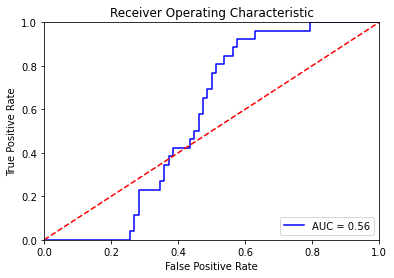

ROC AUC Score for Class 1: 0.57


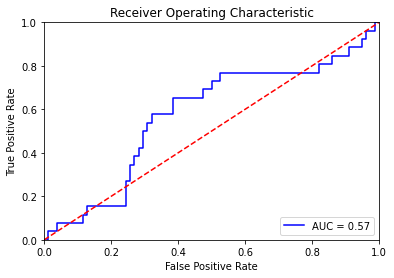

ROC AUC Score for Class 2: 0.61


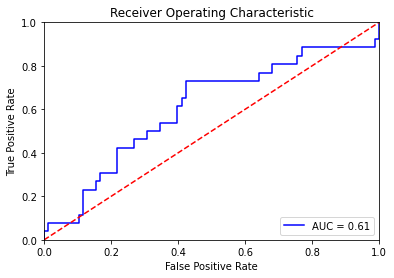

ROC AUC Score for Class 3: 0.14


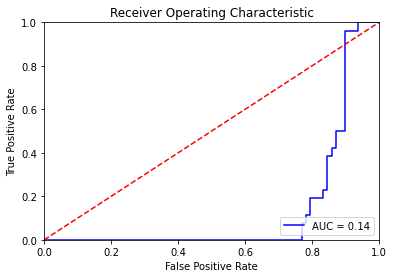

Average ROC AUC Score: 0.47


In [173]:
acc, sen, aucs, av_auc  = figs_merit(y_test_shuf, y_pred, y_prob_pred, model)

In [174]:
# For accuracy
accuracy_scores.append(acc)
# For sensitivity
sensitivity_scores.append(sen)
# For aucs
auc_scores.append(aucs)
# For average auc
avg_auc.append(av_auc)

### 4.5. Comparison of the results obtained with the different models for parametric multiclass classification

In [175]:
results = pd.DataFrame()

results["Accuracy in the test set"] = accuracy_scores
results["Sensitivity in the test set"] = sensitivity_scores
for auc in auc_scores:
    for i in range(len(auc)):
        results["AUC in the test set for UPDRS range", i+1] = auc[i]

#results
results["Models"] = ["SLR for feature 'Median Pitch' without normalizing",
        "SLR for feature 'Median Pitch' after normalizing",
        "MLR with 10 features without normalizing",
        "MLR with 10 features after normalizing",
        "MLR after feature selection without normalizing",
        "MLR after feature selection after normalizing",
        "MLR with regularization through LASSO after normalizing",
        "MLR with regularization through RIDGE after normalizing",
        "MLR with regularization through ELASTICNET after normalizing"]

results.set_index("Models", inplace = True)

In [176]:
results

,Accuracy in the test set,Sensitivity in the test set,"(AUC in the test set for UPDRS range, 1)","(AUC in the test set for UPDRS range, 2)","(AUC in the test set for UPDRS range, 3)","(AUC in the test set for UPDRS range, 4)"
Models,,,,,,
SLR for feature 'Median Pitch' without normalizing,0.04,0.04,0.56,0.57,0.61,0.14
SLR for feature 'Median Pitch' after normalizing,0.04,0.04,0.56,0.57,0.61,0.14
MLR with 10 features without normalizing,0.14,0.14,0.56,0.57,0.61,0.14
MLR with 10 features after normalizing,0.15,0.15,0.56,0.57,0.61,0.14
MLR after feature selection without normalizing,0.11,0.11,0.56,0.57,0.61,0.14
MLR after feature selection after normalizing,0.16,0.16,0.56,0.57,0.61,0.14
MLR with regularization through LASSO after normalizing,0.15,0.15,0.56,0.57,0.61,0.14
MLR with regularization through RIDGE after normalizing,0.15,0.15,0.56,0.57,0.61,0.14
MLR with regularization through ELASTICNET after normalizing,0.15,0.15,0.56,0.57,0.61,0.14


In the context of multiclass classification, the results continue to reflect a trend of mediocre performance across various logistic regression models. Accuracy, which is a pivotal metric in classification tasks, notably decreases, and the AUC values for different classes exhibit variations. The distinct nature of the target variable, now representing different UPDRS ranges, influences the selection of relevant features, leading to a shift in the features that best estimate the target variable compared to the previous binary classification problem.

Emphasizing the nuances introduced by the change in the target variable, it's notable that while some features remain influential, the dynamics of feature importance may vary for different UPDRS ranges. This underscores the importance of tailoring feature selection strategies based on the specific characteristics of the target variable in multiclass problems.

Furthermore, the application of regularization techniques such as LASSO, RIDGE, and ELASTICNET yields similar results, indicating a consistent impact across various models. The regularization, while stabilizing the model and potentially preventing overfitting, doesn't significantly enhance the overall predictive performance.

It's crucial to highlight the limitations in accuracy for all models, suggesting that the logistic regression framework may struggle to effectively capture the complexities inherent in the dataset for this multiclass classification problem. Given the persistent mediocrity, consideration should be given to exploring more sophisticated machine learning algorithms, including ensemble methods like Random Forests or Gradient Boosting, and even deep learning techniques such as neural networks. These models can offer increased capacity for capturing intricate patterns within the data, potentially leading to improved classification results.